In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import balanced_accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.svm import SVC, SVR
from pingouin import multivariate_normality


In [2]:
df_train = pd.read_excel('TrainDataset2024.xls')
df_train.head()

,ID,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,TRG002174,1,144.0,41.0,0,0,0,1,3,3,...,0.517172,0.375126,3.325332,0.002314,3880771.500,473.464852,0.000768,0.182615,0.030508,0.000758
1,TRG002178,0,142.0,39.0,1,1,0,0,3,3,...,0.444391,0.444391,3.032144,0.005612,2372009.744,59.459710,0.004383,0.032012,0.001006,0.003685
2,TRG002204,1,135.0,31.0,0,0,0,1,2,1,...,0.534549,0.534549,2.485848,0.006752,1540027.421,33.935384,0.007584,0.024062,0.000529,0.006447
3,TRG002206,0,12.0,35.0,0,0,0,1,3,3,...,0.506185,0.506185,2.606255,0.003755,6936740.794,46.859265,0.005424,0.013707,0.000178,0.004543
4,TRG002210,0,109.0,61.0,1,0,0,0,2,1,...,0.462282,0.462282,2.809279,0.006521,1265399.054,39.621023,0.006585,0.034148,0.001083,0.005626


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Columns: 121 entries, ID to original_ngtdm_Strength
dtypes: float64(108), int64(12), object(1)
memory usage: 378.3+ KB


In [4]:
df_train = df_train.replace(999, np.nan) # replace 999 with nan

missing_values = df_train.isnull().sum()

for i in range(len(missing_values)):
    if missing_values.values[i] > 0:
        print(f"Column '{missing_values.index[i]}' has {missing_values.values[i]} missing values.")

Column 'pCR (outcome)' has 5 missing values.
Column 'PgR' has 1 missing values.
Column 'HER2' has 1 missing values.
Column 'TrippleNegative' has 1 missing values.
Column 'ChemoGrade' has 3 missing values.
Column 'Proliferation' has 2 missing values.
Column 'HistologyType' has 3 missing values.
Column 'LNStatus' has 1 missing values.
Column 'Gene' has 88 missing values.


In [5]:
tumour_col_names = [] 
for i in list(df_train.columns):
    if "original_" in i:
        tumour_col_names.append(i)
df_train_tumour = df_train[tumour_col_names]
df_train_tumour.head()

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,0.813912,0.724080,23.781937,32.844370,37.696154,38.626416,34.713110,39.572718,14209.458330,26.732440,...,0.517172,0.375126,3.325332,0.002314,3880771.500,473.464852,0.000768,0.182615,0.030508,0.000758
1,0.666118,0.476173,20.715461,43.504095,51.971146,41.761226,36.400549,53.310412,14202.708330,28.978871,...,0.444391,0.444391,3.032144,0.005612,2372009.744,59.459710,0.004383,0.032012,0.001006,0.003685
2,0.645083,0.594470,21.659822,36.435505,32.984845,40.447497,42.379240,44.384682,10858.375000,23.503921,...,0.534549,0.534549,2.485848,0.006752,1540027.421,33.935384,0.007584,0.024062,0.000529,0.006447
3,0.770842,0.501228,26.590504,53.050724,66.910388,44.944410,66.760767,69.000000,26748.208330,40.893735,...,0.506185,0.506185,2.606255,0.003755,6936740.794,46.859265,0.005424,0.013707,0.000178,0.004543
4,0.861035,0.750267,20.456571,27.265716,33.241540,30.594117,31.384710,35.042831,8846.541667,23.476732,...,0.462282,0.462282,2.809279,0.006521,1265399.054,39.621023,0.006585,0.034148,0.001083,0.005626


### Skewness and kurtosis

In [6]:
# A lot of the tumour data is highly skewed with not normal kurtosis therefore use modified Z-scores for univariate outlier detection

df_train_cols_tumour = df_train_tumour.columns
dict_col_stats = {}

for col in df_train_cols_tumour:
    skewness = round( df_train_tumour[col].skew(), 3 )
    kurtosis = round( df_train_tumour[col].kurtosis(), 3 )
    inner_dict = {}
    inner_dict["skewness"] = skewness
    inner_dict["kurtosis"] = kurtosis
    dict_col_stats[col] = inner_dict

df_col_stats = pd.DataFrame(dict_col_stats).transpose()
print("Skewness: 0 normally distirbuted, > 0 tail is on the right , < 0 tail is on the left")
print("Kurtosis: 3 normally distributed, > 3 fat tails, < 3 thin")
df_col_stats

Skewness: 0 normally distirbuted, > 0 tail is on the right , < 0 tail is on the left
Kurtosis: 3 normally distributed, > 3 fat tails, < 3 thin


,skewness,kurtosis
original_shape_Elongation,-0.788,0.281
original_shape_Flatness,-0.169,-0.803
original_shape_LeastAxisLength,1.846,7.361
original_shape_MajorAxisLength,3.455,22.724
original_shape_Maximum2DDiameterColumn,1.410,2.282
...,...,...
original_ngtdm_Busyness,19.239,379.507
original_ngtdm_Coarseness,5.293,26.143
original_ngtdm_Complexity,0.986,1.126
original_ngtdm_Contrast,2.331,7.279


### Univariate outlier detection

In [7]:
# Detecting potential input errors using univariate outlier detection on each column:

# Finding the modified z score for each value in each column
# Modified Z-scores: Uses the median and Median Absolute Deviation (MAD) instead of mean and standard deviation, more robust for skewed data.
# https://www.ibm.com/docs/en/cognos-analytics/12.0.0?topic=terms-modified-z-score
# https://www.statology.org/modified-z-score/     --->      https://github.com/jainyk/Anomaly-detection/blob/master/Zscore%20and%20modified%20zscore/Anomaly%20detection%20by%20zscore%20and%20modified%20zscore.ipynb

ID_col = df_train['ID']

df_mod_zscores = pd.DataFrame(ID_col)
# print(df_mod_zscores)

for col in df_train_cols_tumour:
    consistency_correction = 1.4826
    data = np.array( df_train_tumour[col] )
    median = np.median(data)
    deviation_from_med = np.array(data) - median
    mad = np.median( np.abs( deviation_from_med ) )
    mod_zscore = deviation_from_med / (consistency_correction * mad )
    mod_zscore.round( 6 )
    df_mod_zscores[col] = mod_zscore.round(6)

df_mod_zscores.head()

/var/folders/8q/qyl0908j5b3304f4bj_xjf_80000gn/T/ipykernel_30896/802897122.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_mod_zscores[col] = mod_zscore.round(6)
/var/folders/8q/qyl0908j5b3304f4bj_xjf_80000gn/T/ipykernel_30896/802897122.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_mod_zscores[col] = mod_zscore.round(6)
/var/folders/8q/qyl0908j5b3304f4bj_xjf_80000gn/T/ipykernel_30896/802897122.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many t

,ID,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,TRG002174,0.422097,0.867441,0.260009,-0.331191,-0.184731,0.014983,-0.249481,-0.351747,0.202452,...,0.802471,-0.228322,0.710761,-0.250282,0.153344,4.641422,-0.795829,2.719108,8.215549,-0.716460
1,TRG002178,-0.479399,-0.373306,-0.105563,0.220447,0.586472,0.200436,-0.160177,0.246905,0.201836,...,0.259721,0.292868,0.302519,1.059981,-0.230059,-0.096940,-0.000091,-0.317079,-0.386002,0.116301
2,TRG002204,-0.607708,0.218761,0.007020,-0.145351,-0.439258,0.122717,0.156234,-0.142054,-0.103157,...,0.932059,0.971280,-0.458158,1.512533,-0.441480,-0.389071,0.704451,-0.477366,-0.524863,0.902125
3,TRG002206,0.159383,-0.247907,0.594834,0.714483,1.393561,0.388749,1.446580,0.930616,1.345947,...,0.720541,0.757851,-0.290501,0.322120,0.929920,-0.241154,0.229118,-0.686120,-0.627470,0.360383
4,TRG002210,0.709529,0.998507,-0.136427,-0.619885,-0.425390,-0.460199,-0.425631,-0.549147,-0.286630,...,0.393141,0.427493,-0.007805,1.420949,-0.511268,-0.323997,0.484635,-0.274030,-0.363349,0.668542


#### Plotting histograms of modified z scores and original data


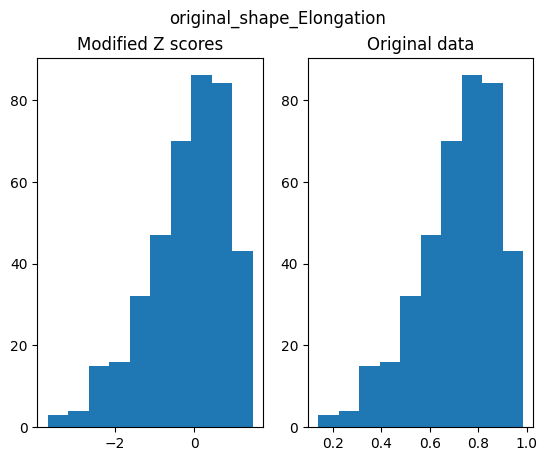

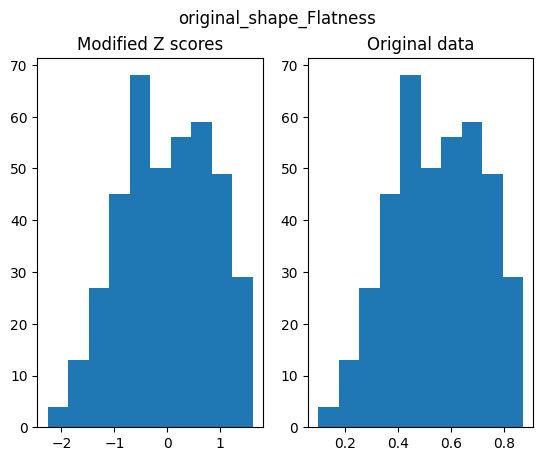

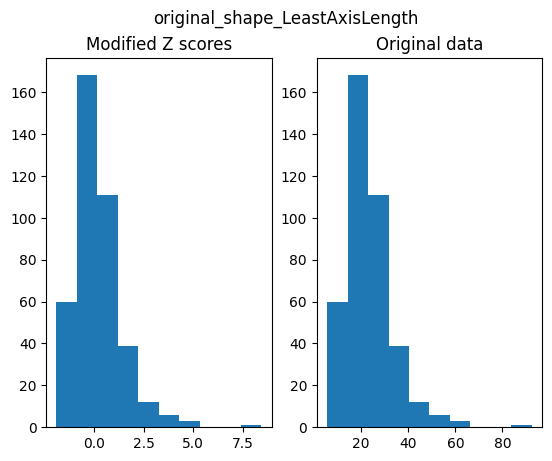

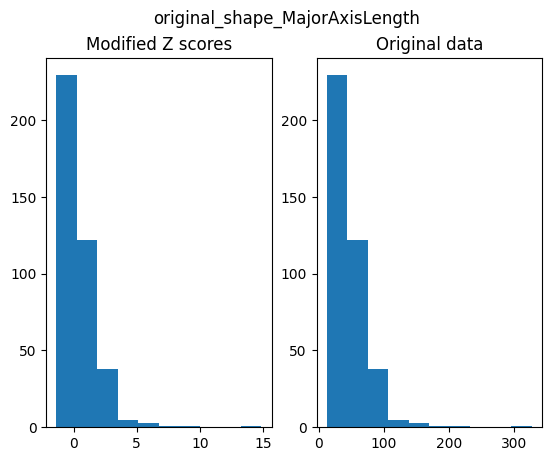

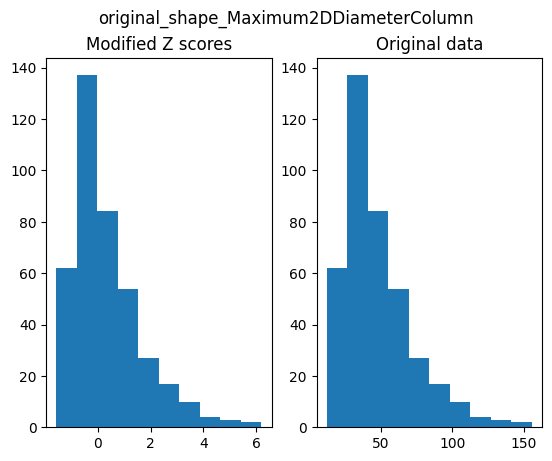

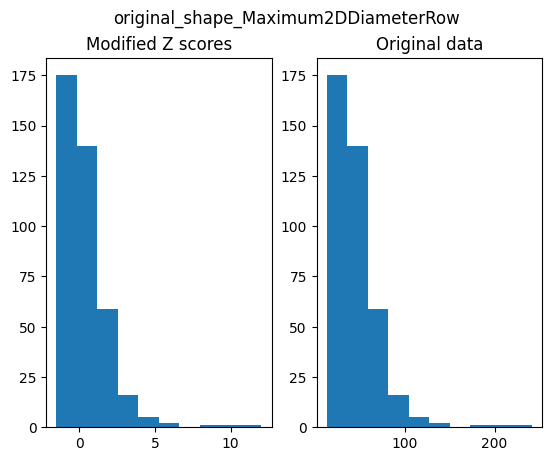

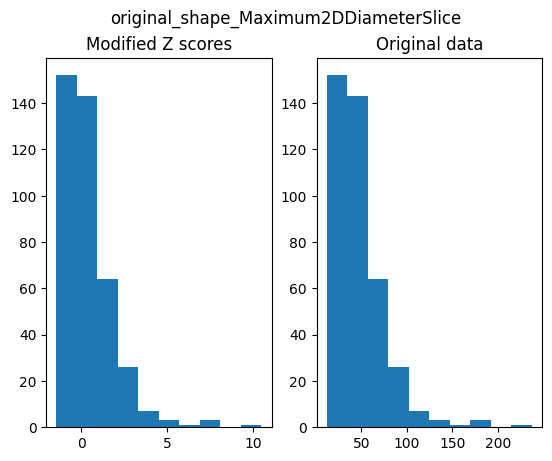

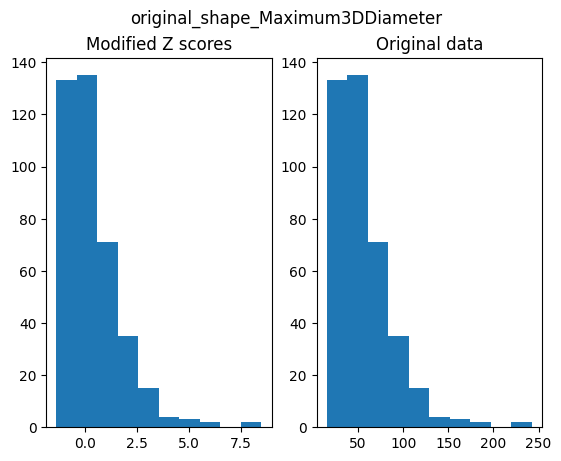

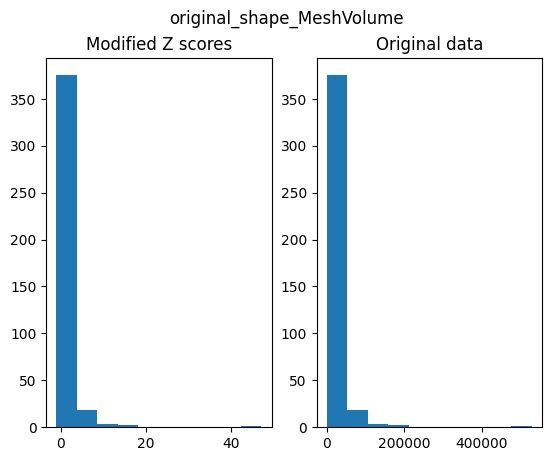

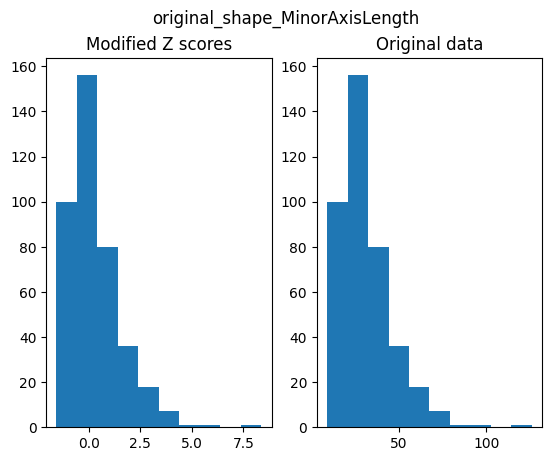

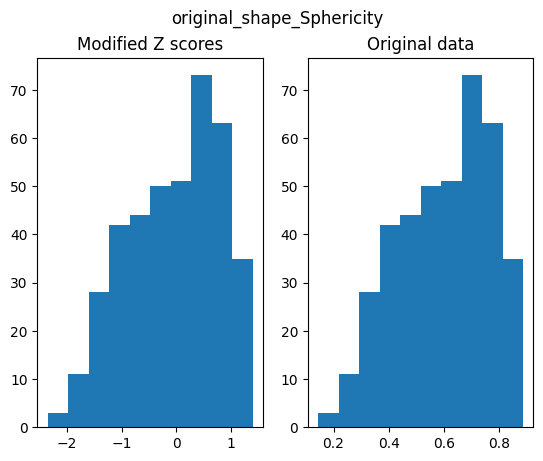

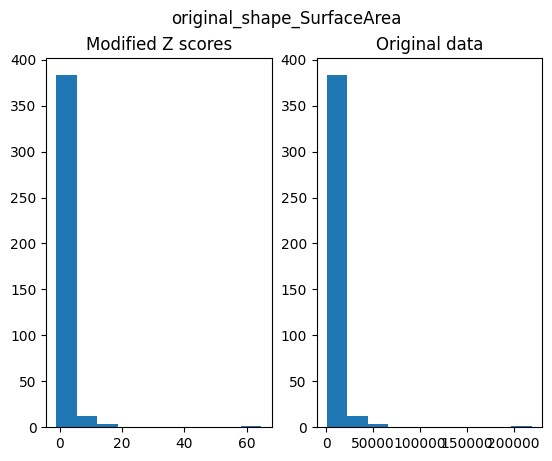

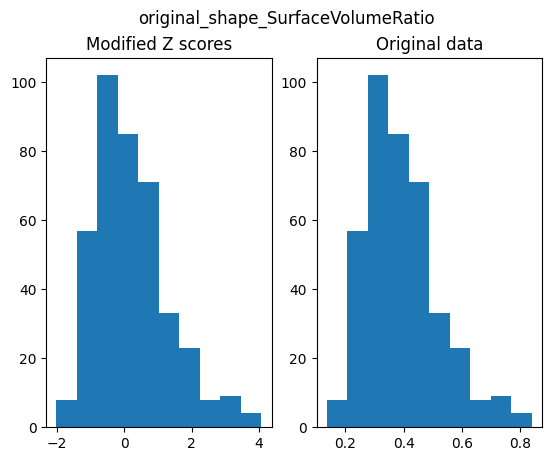

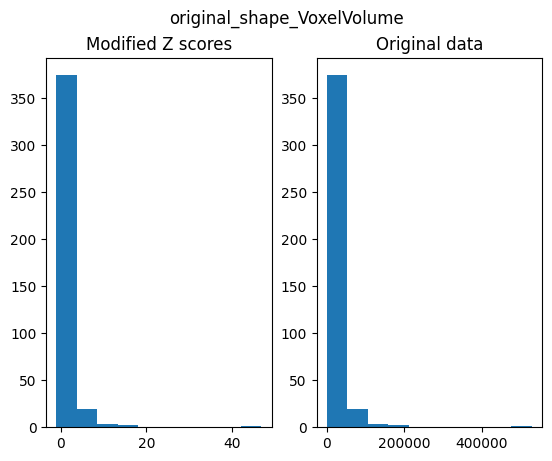

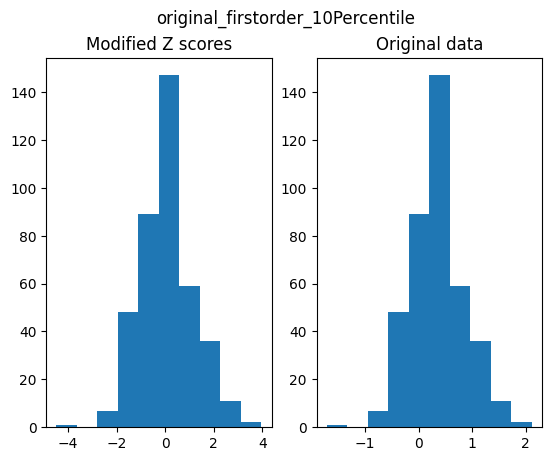

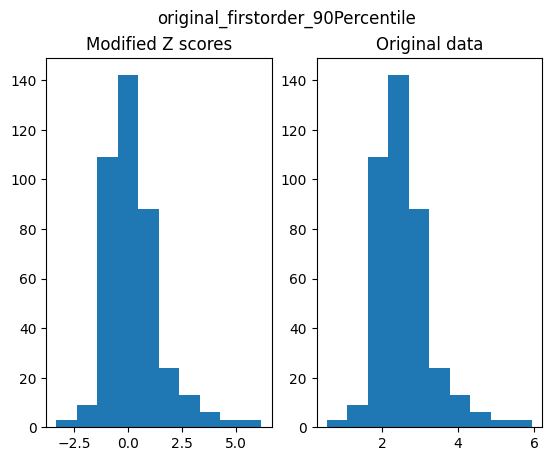

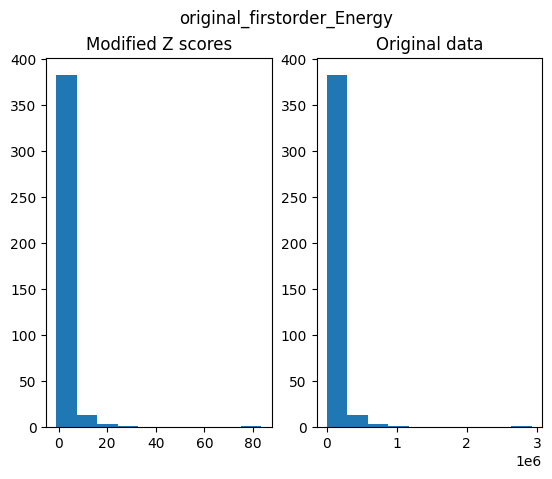

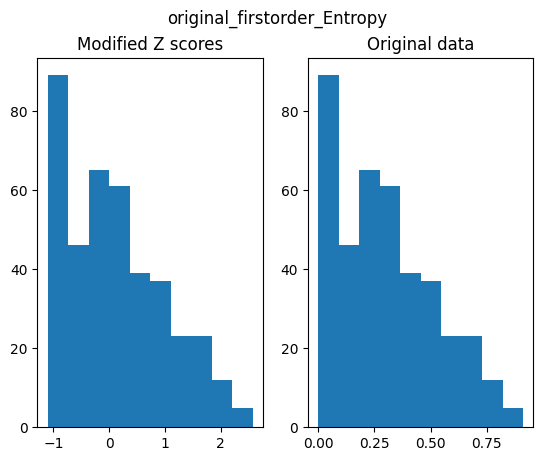

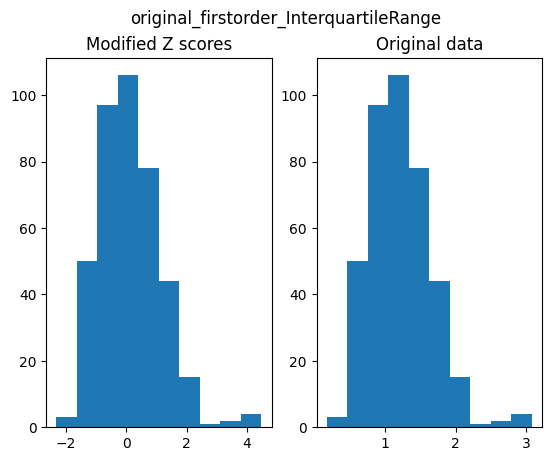

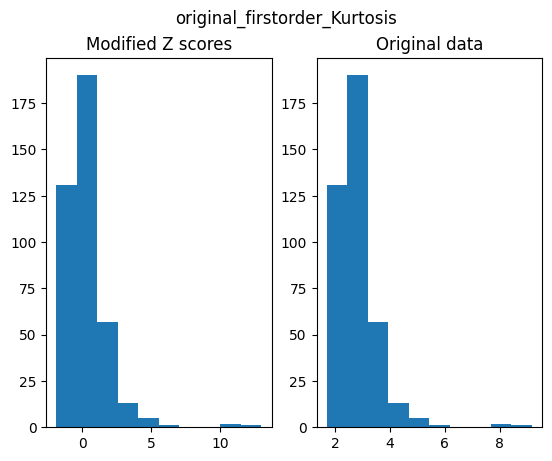

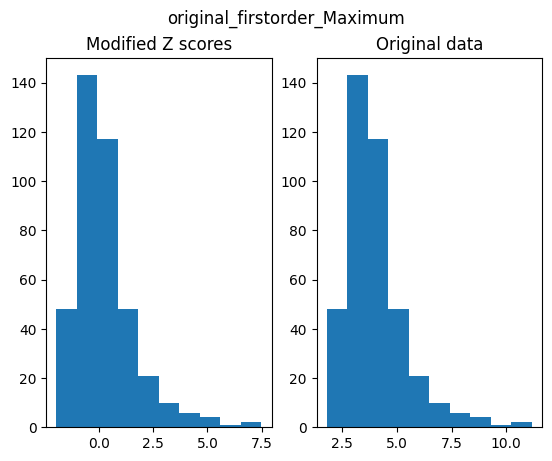

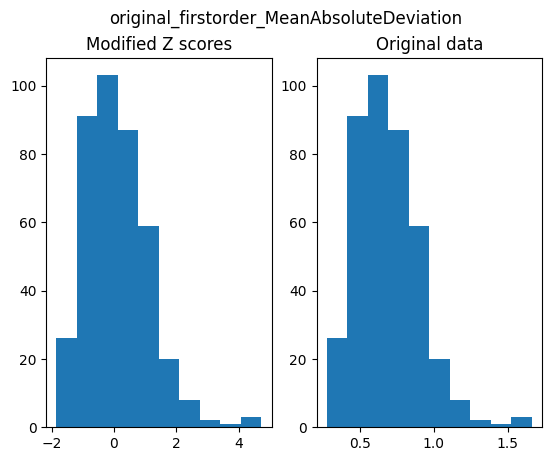

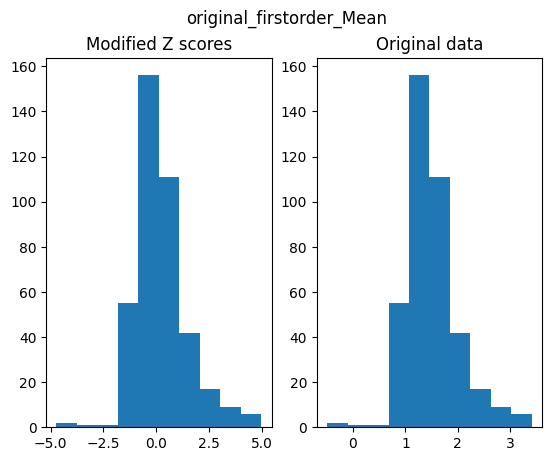

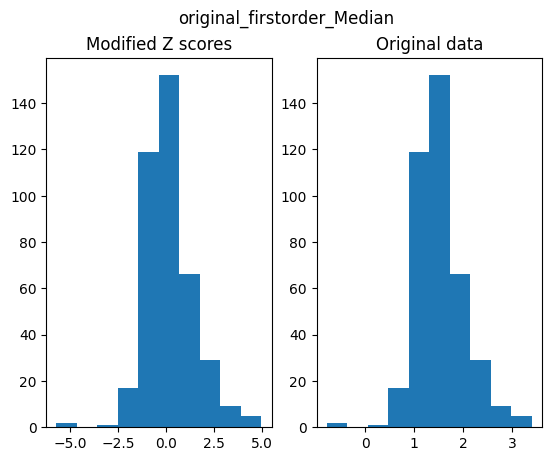

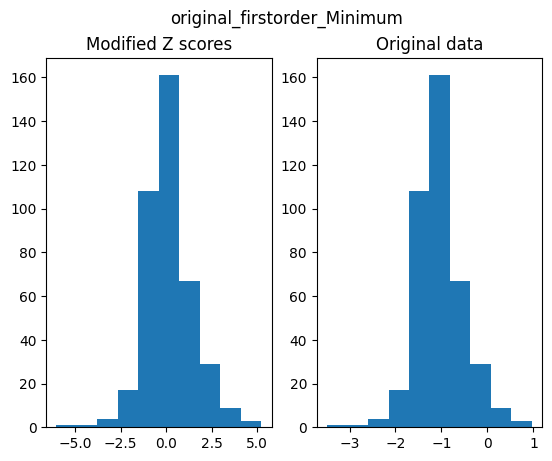

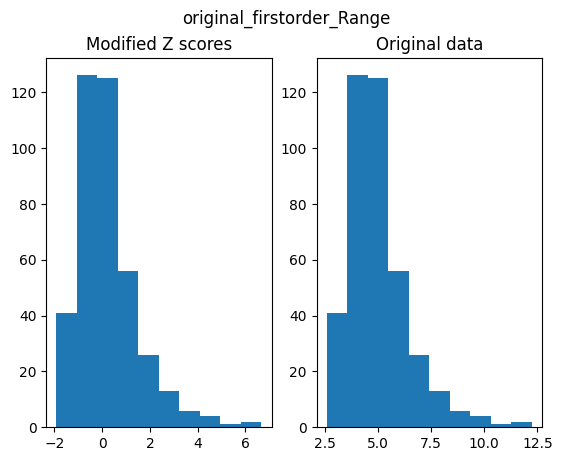

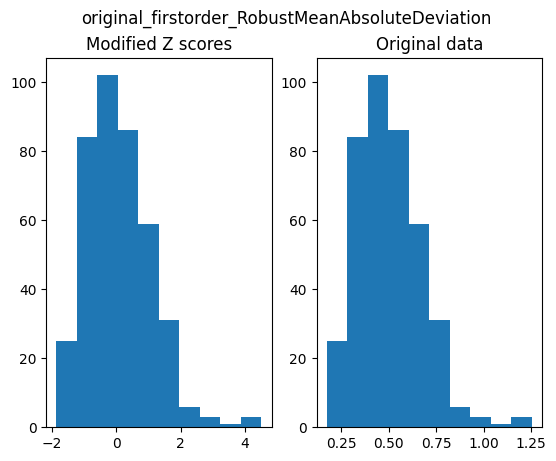

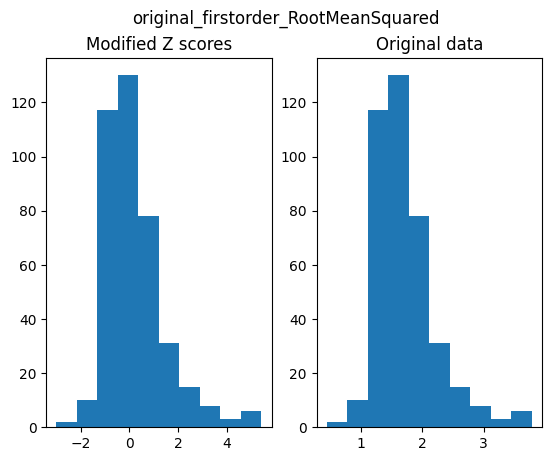

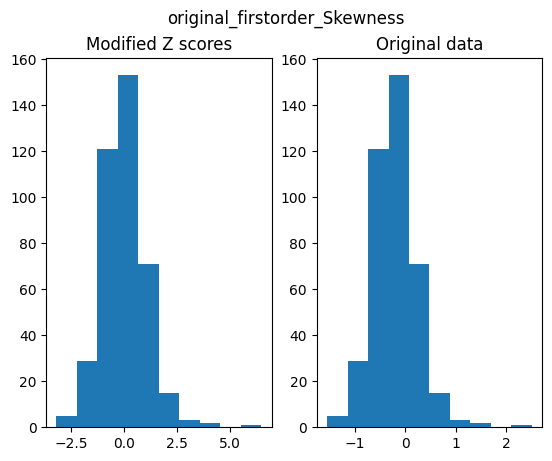

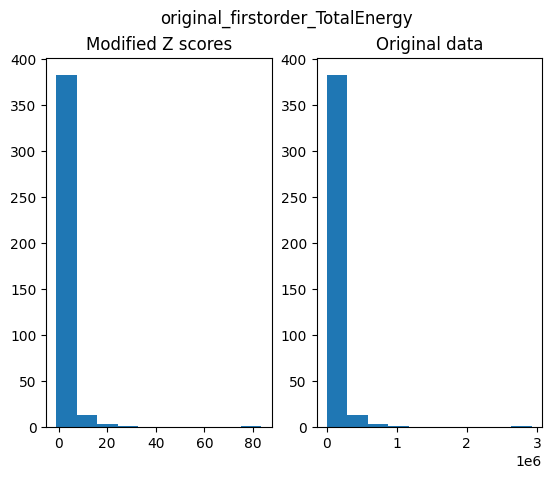

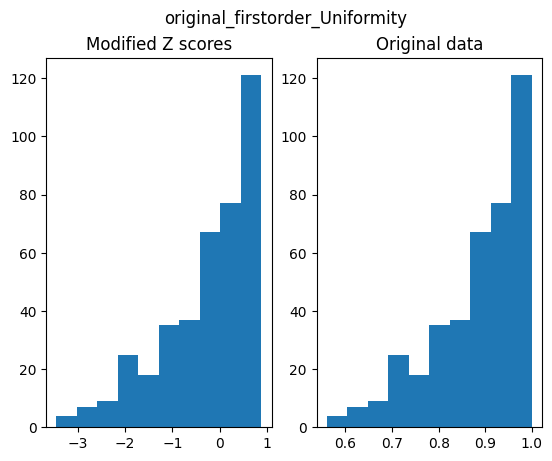

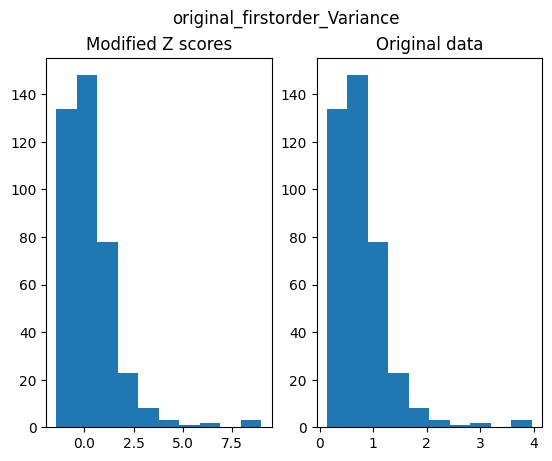

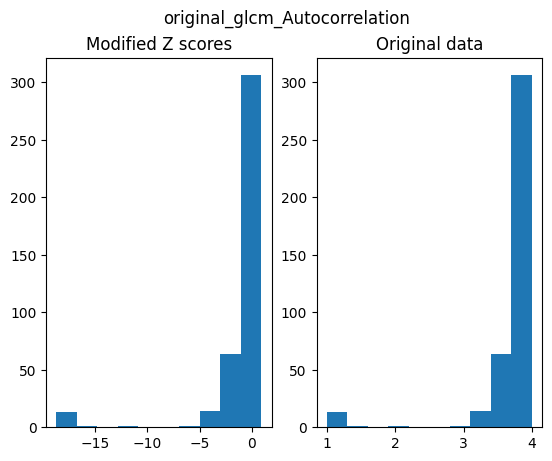

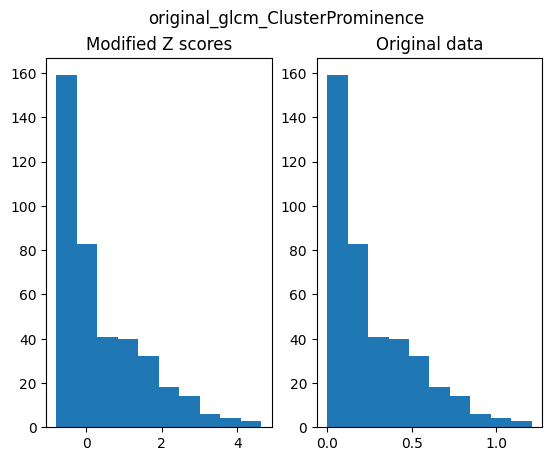

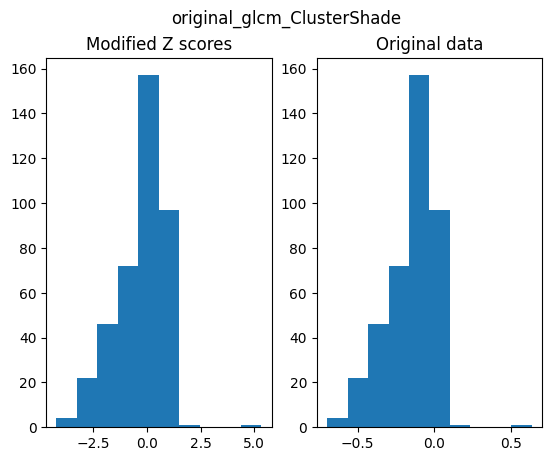

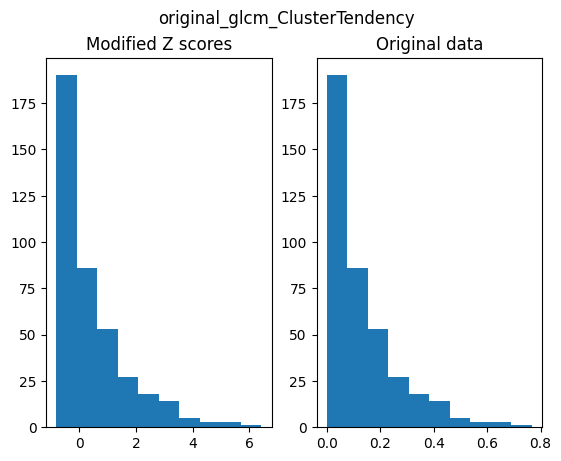

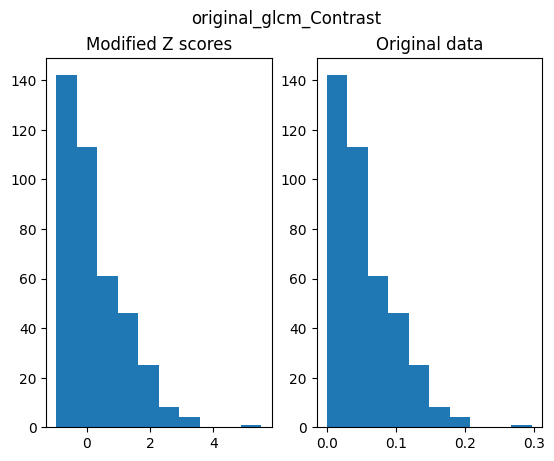

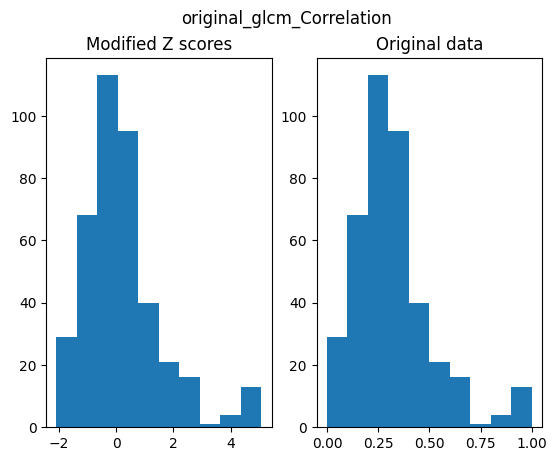

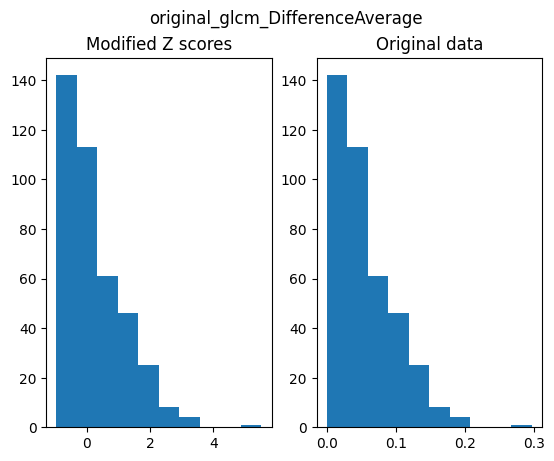

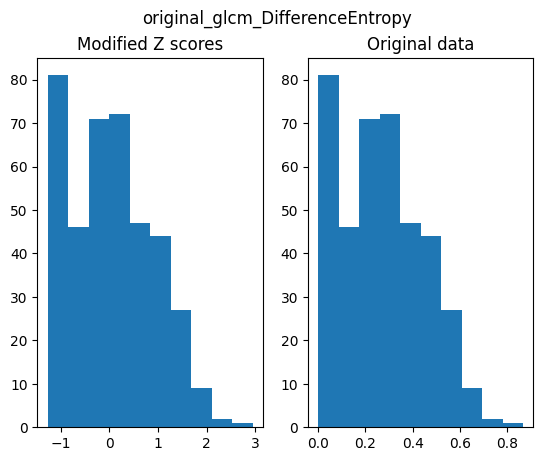

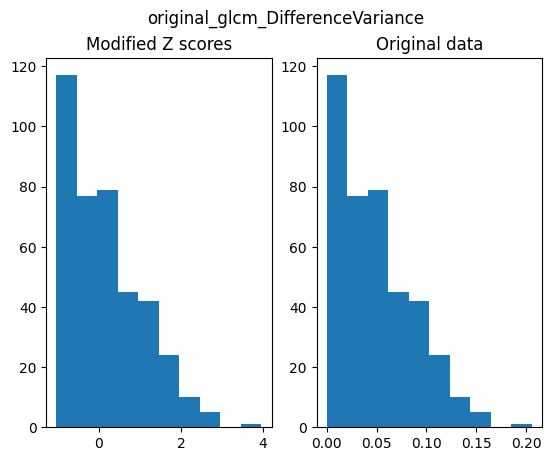

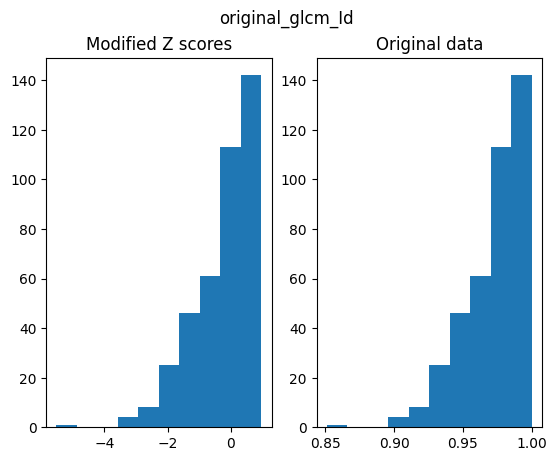

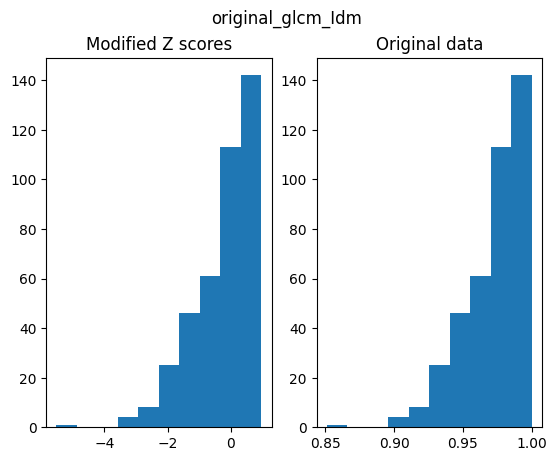

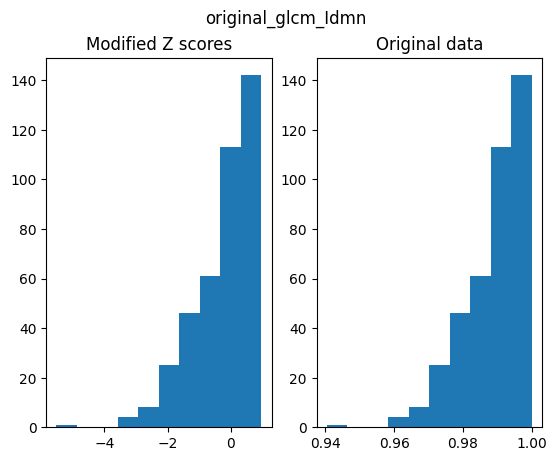

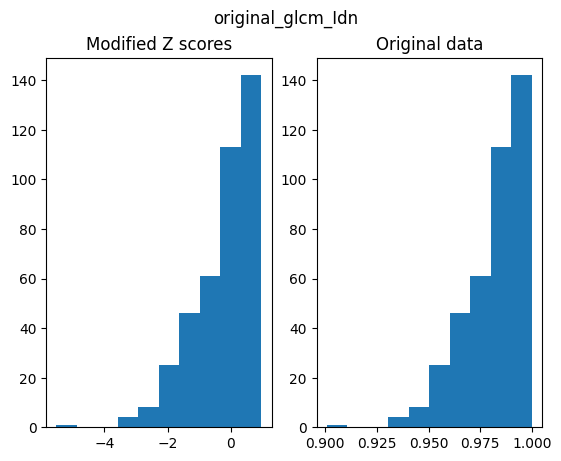

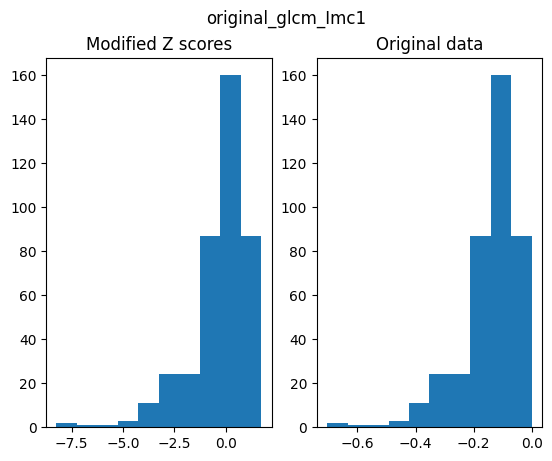

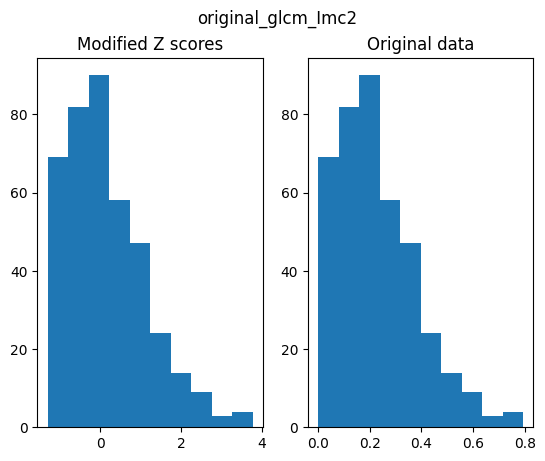

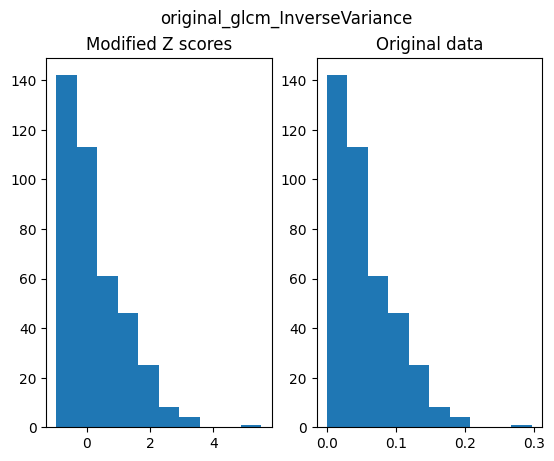

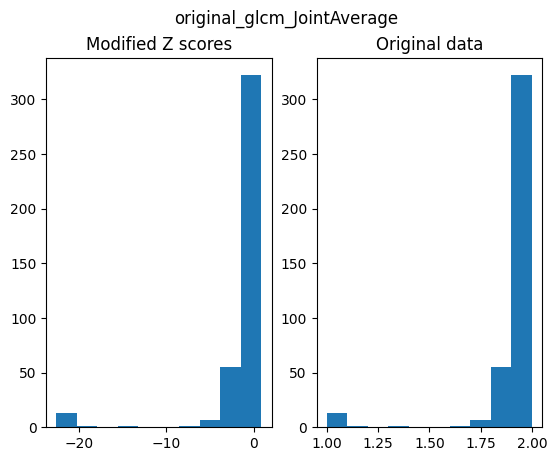

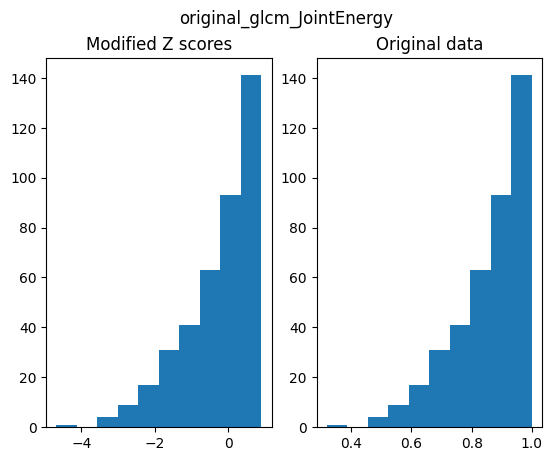

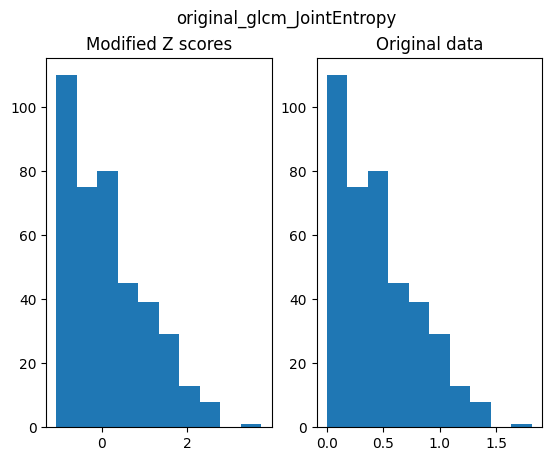

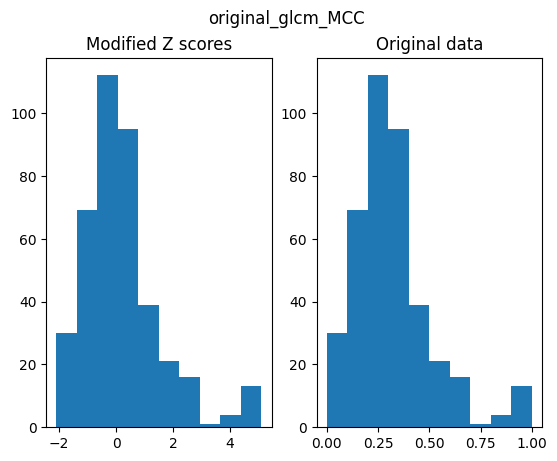

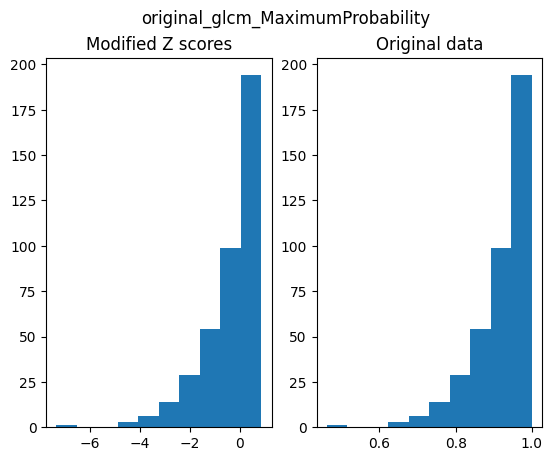

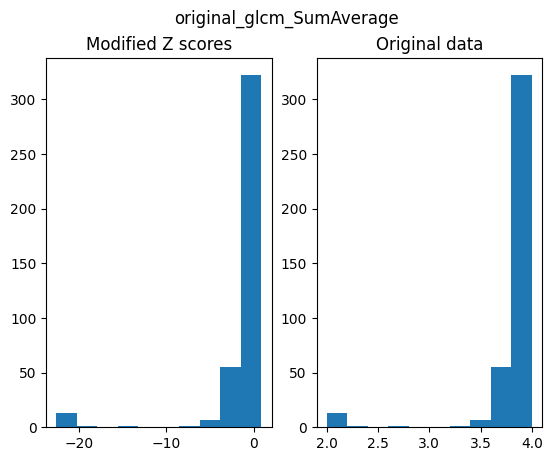

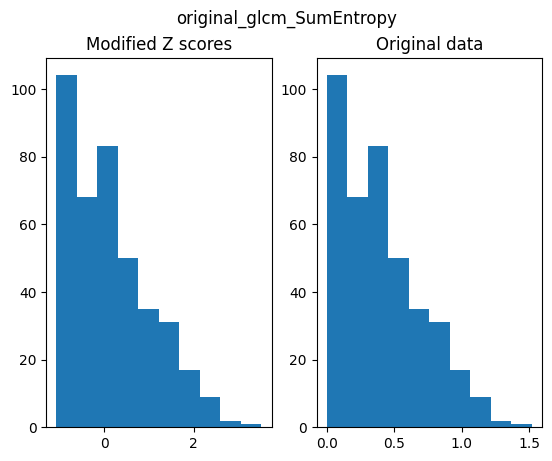

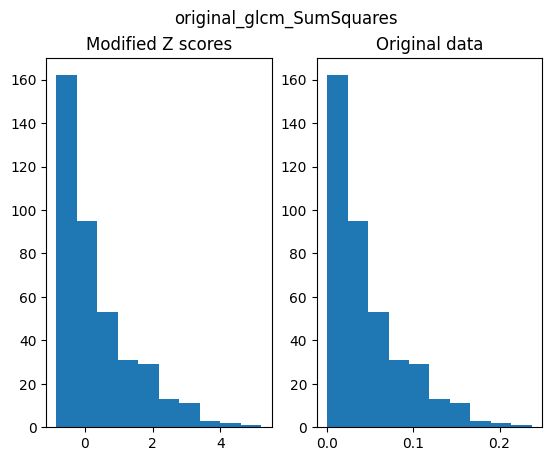

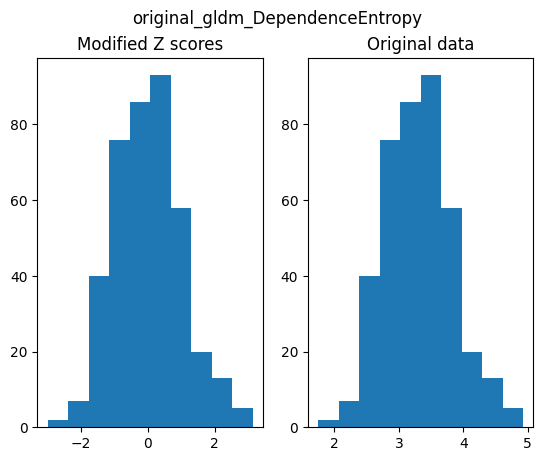

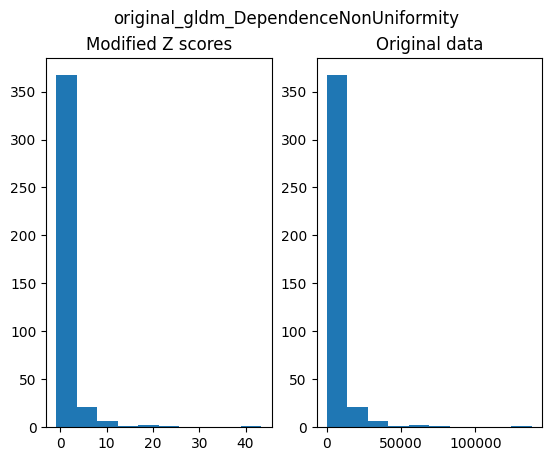

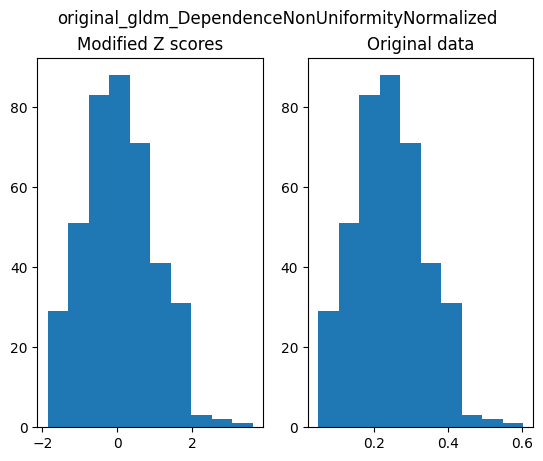

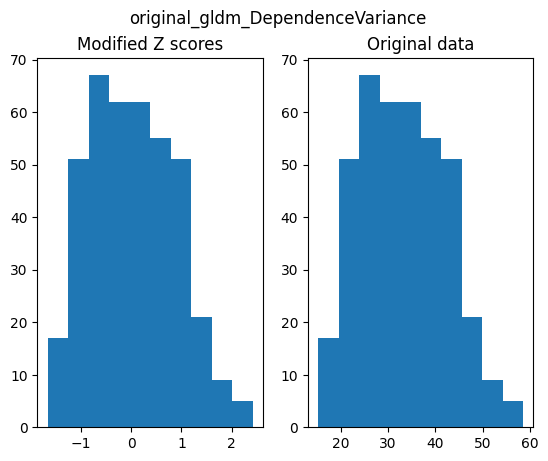

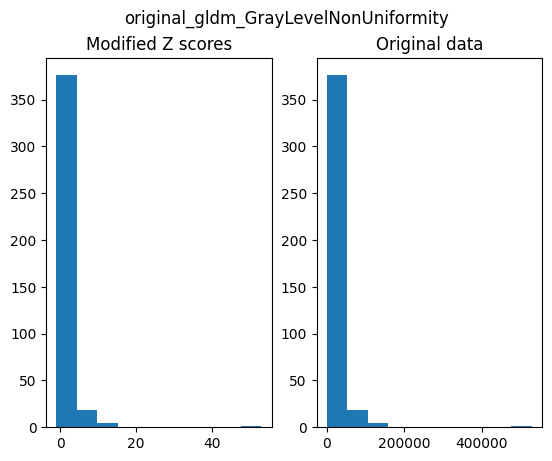

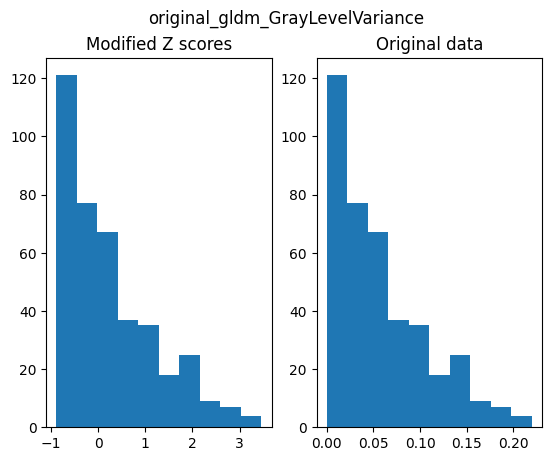

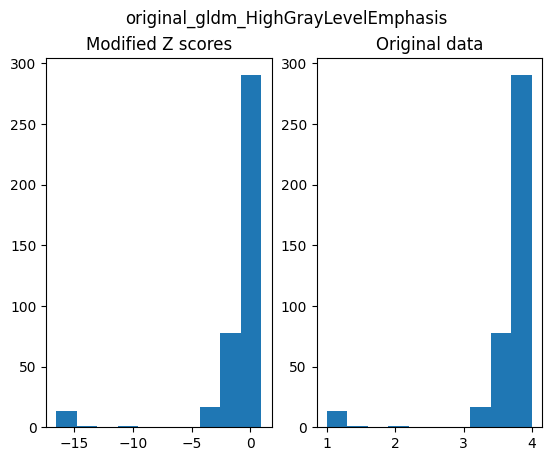

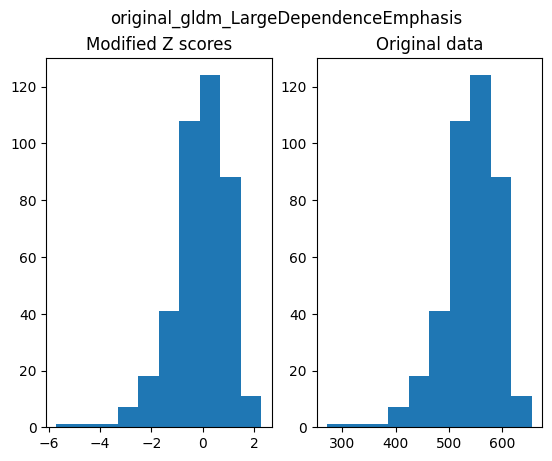

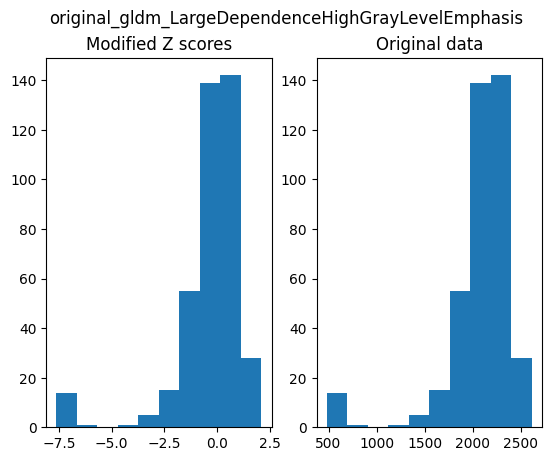

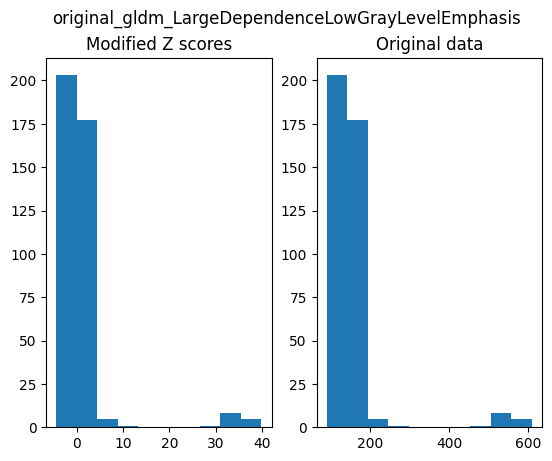

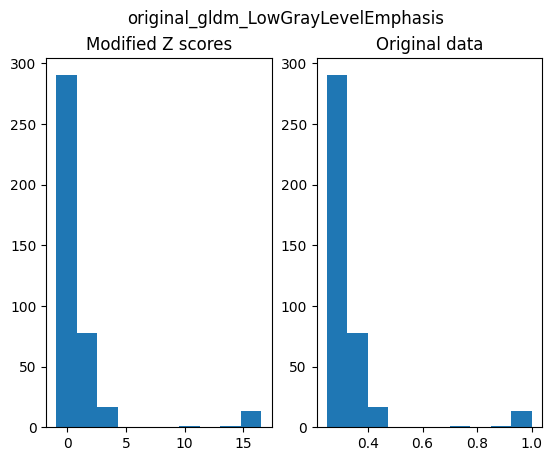

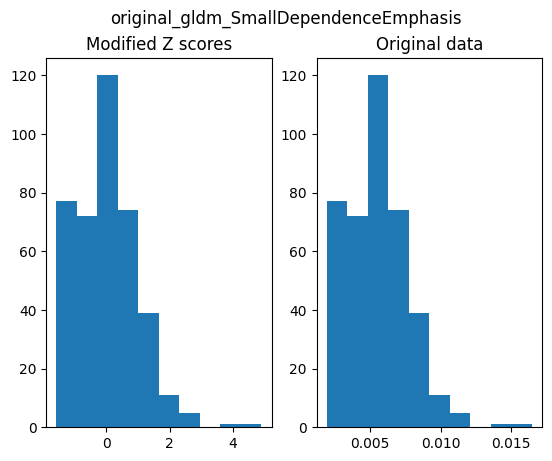

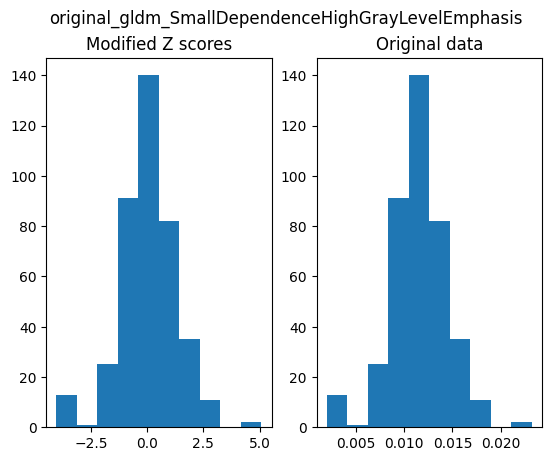

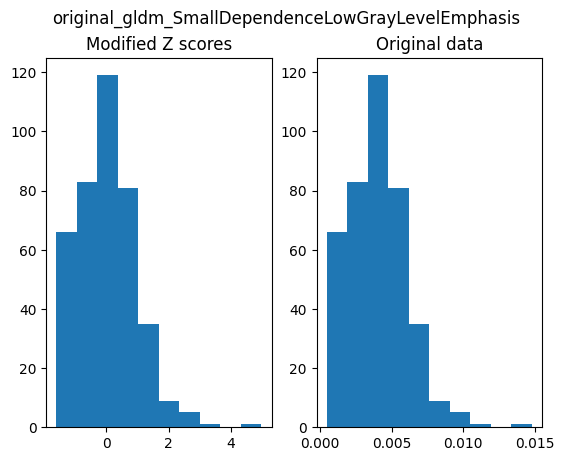

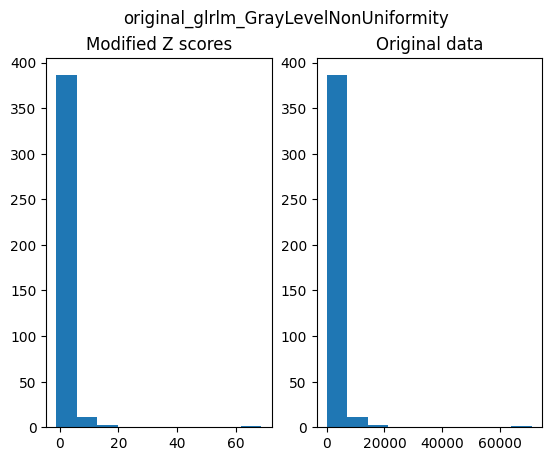

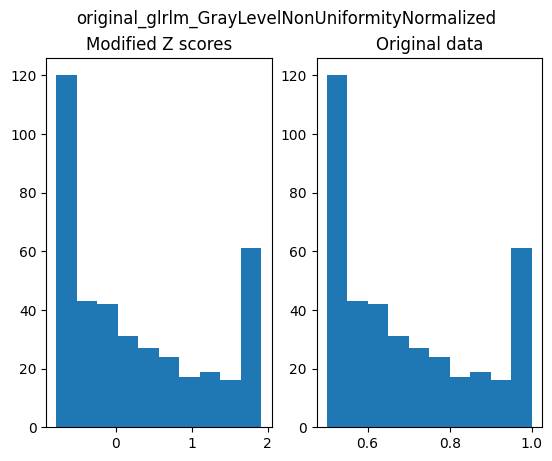

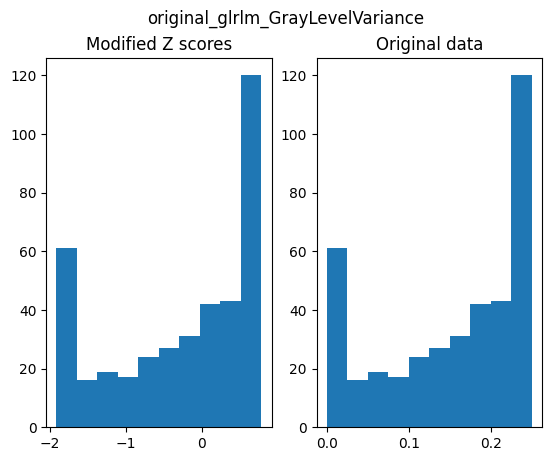

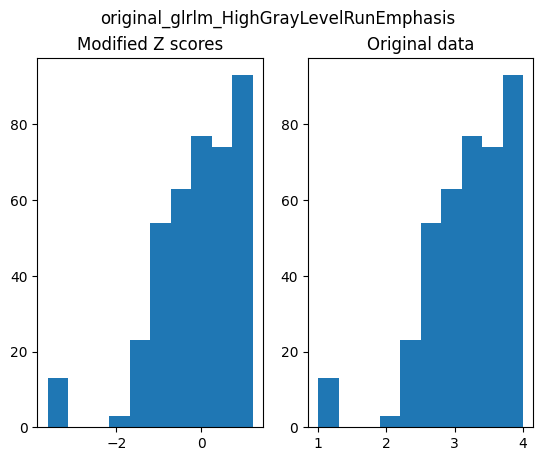

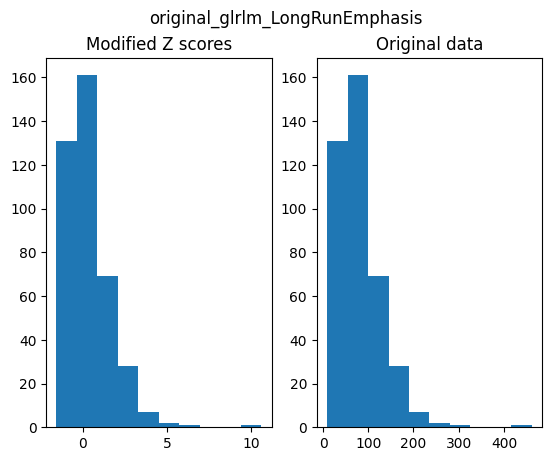

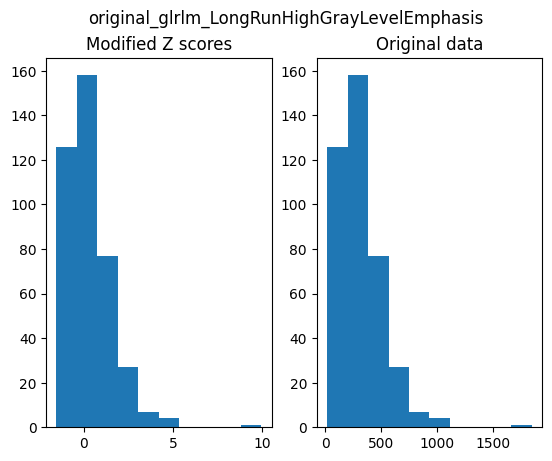

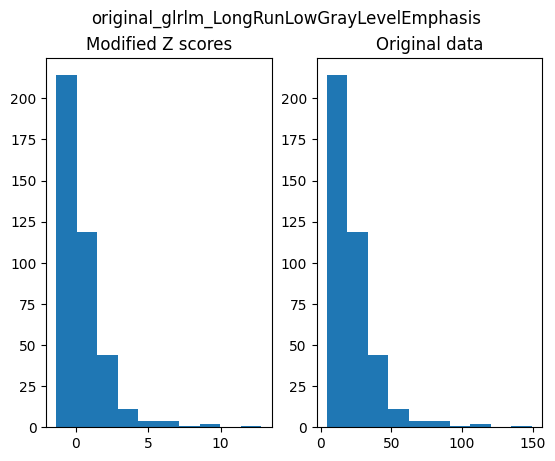

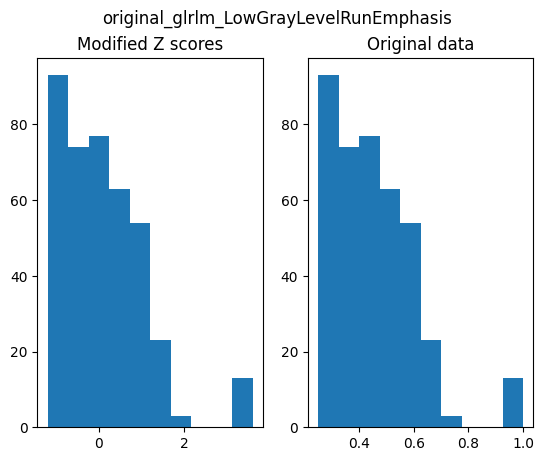

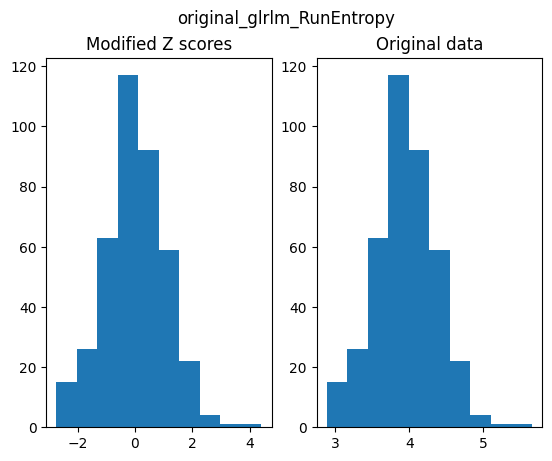

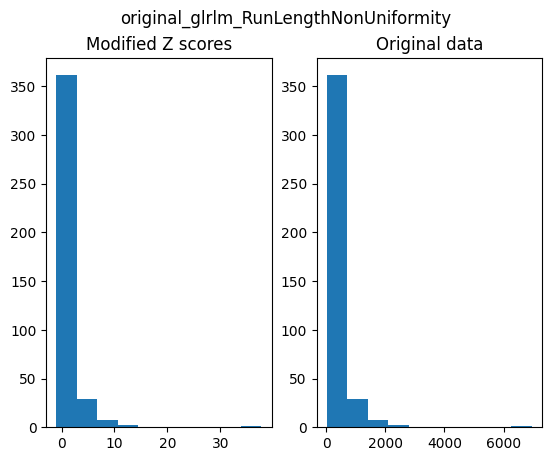

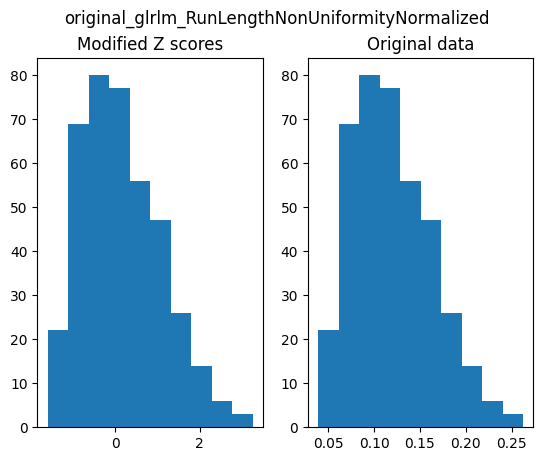

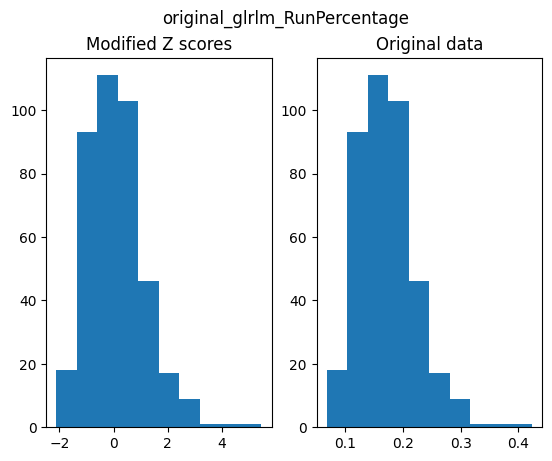

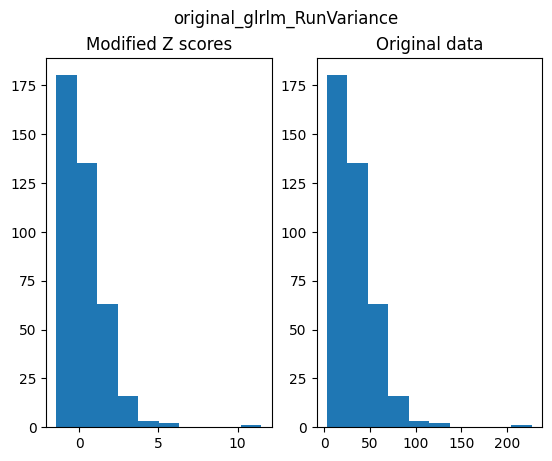

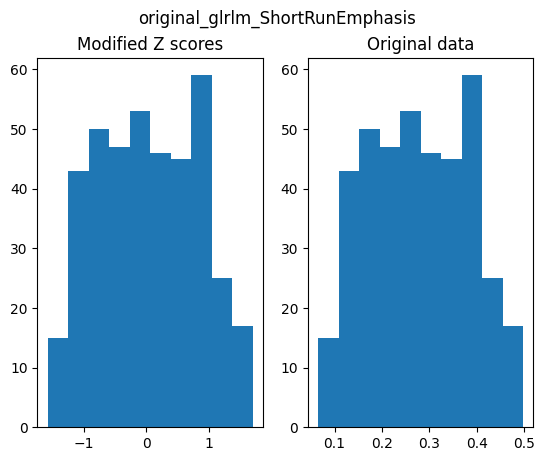

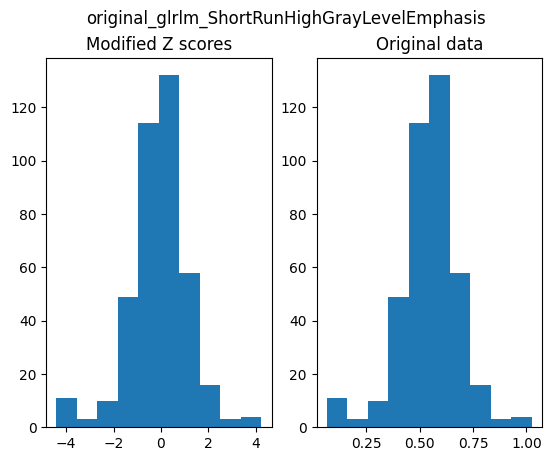

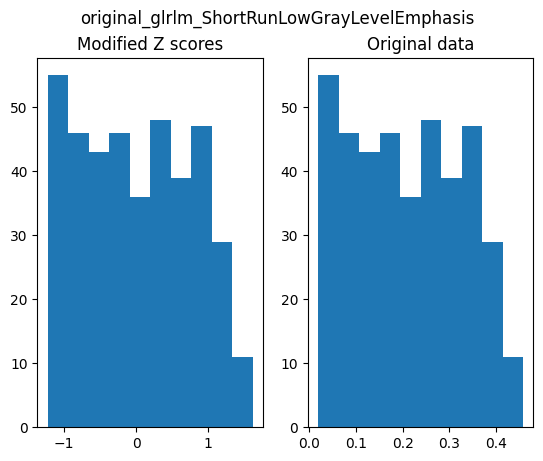

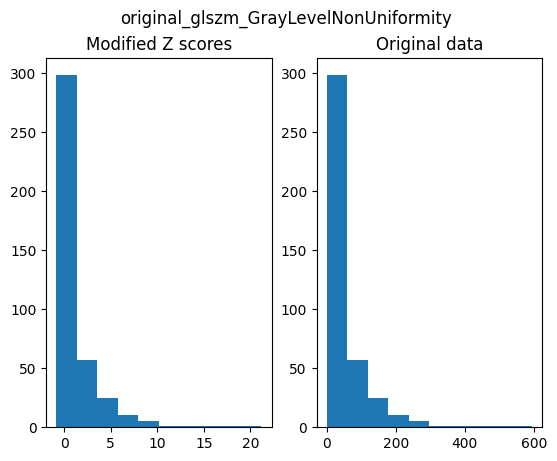

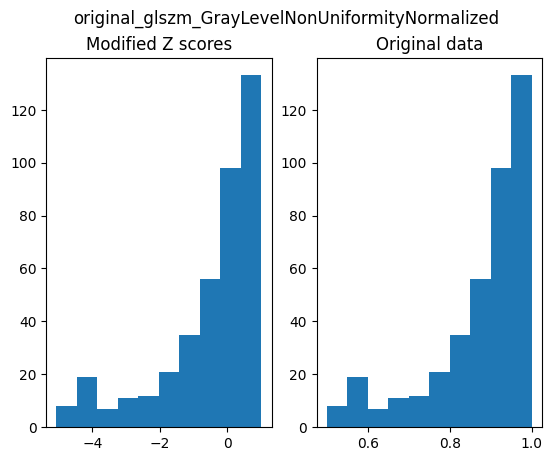

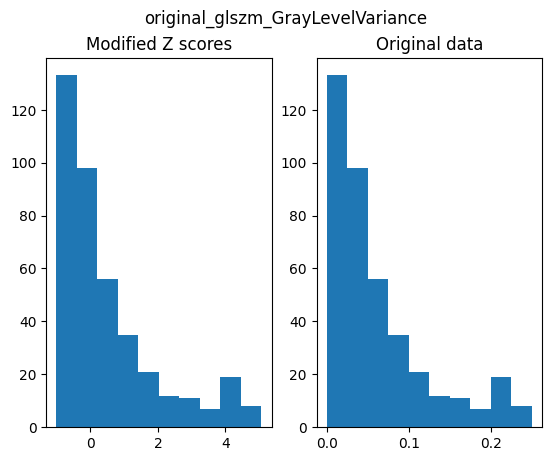

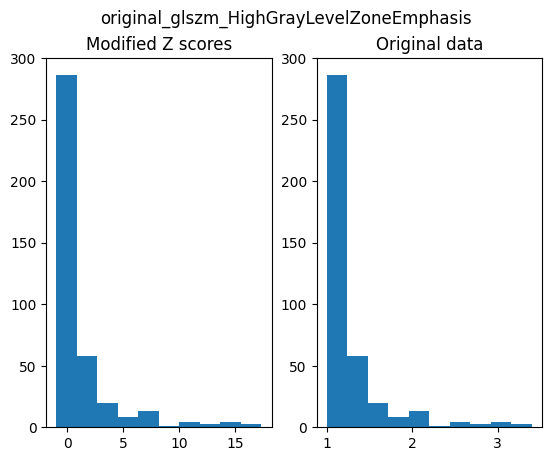

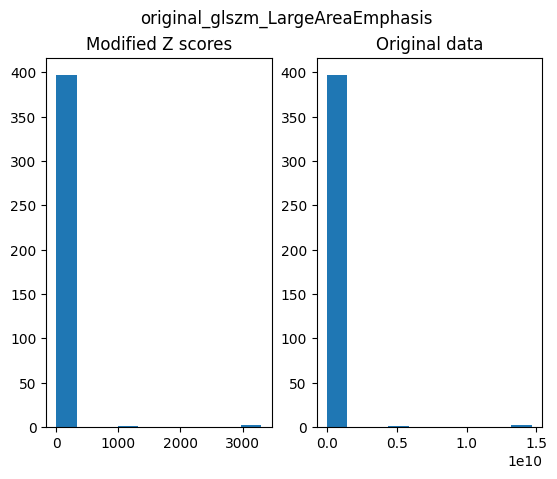

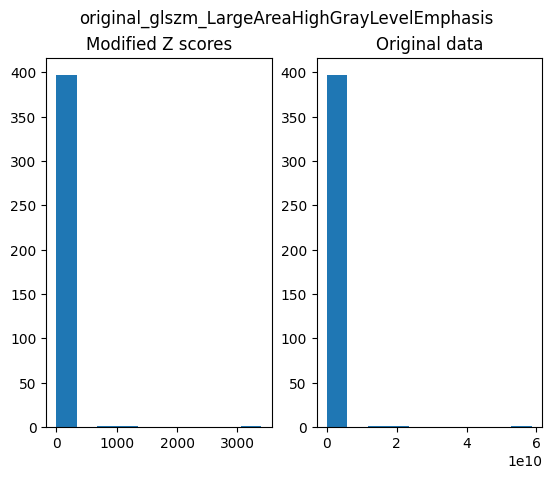

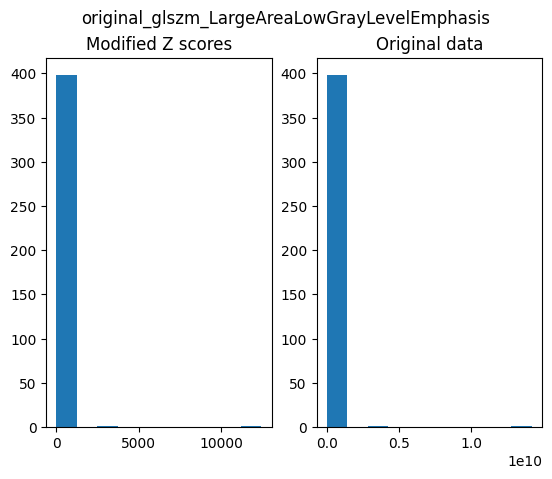

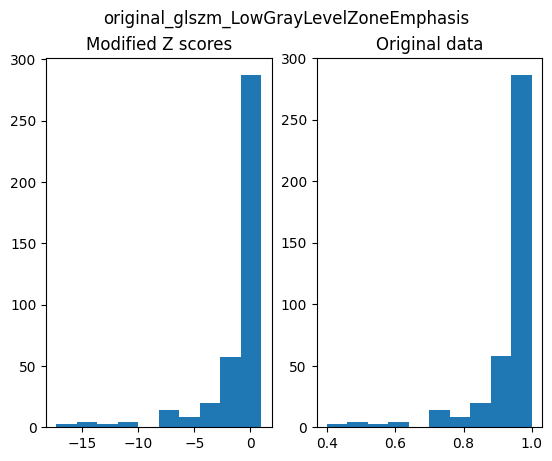

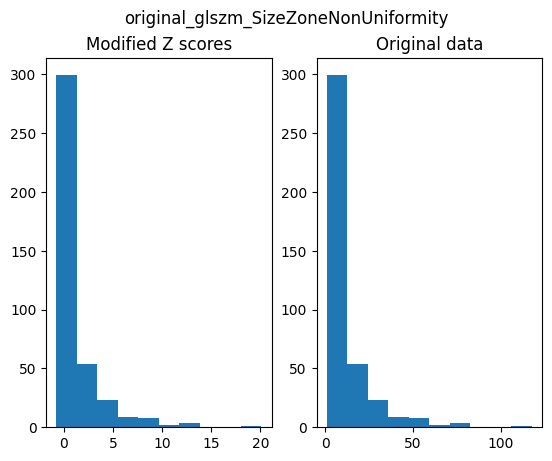

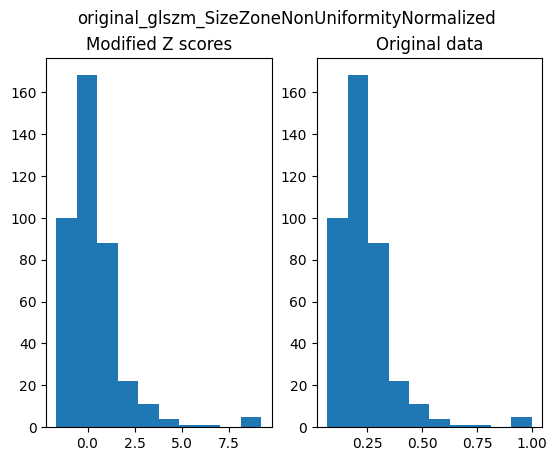

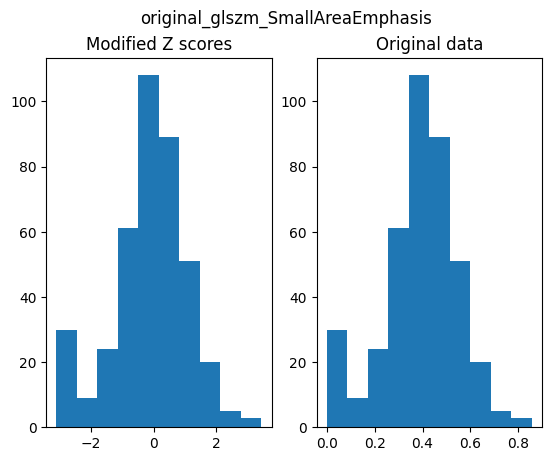

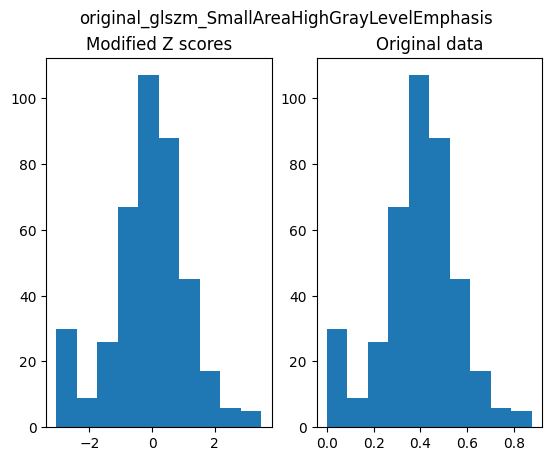

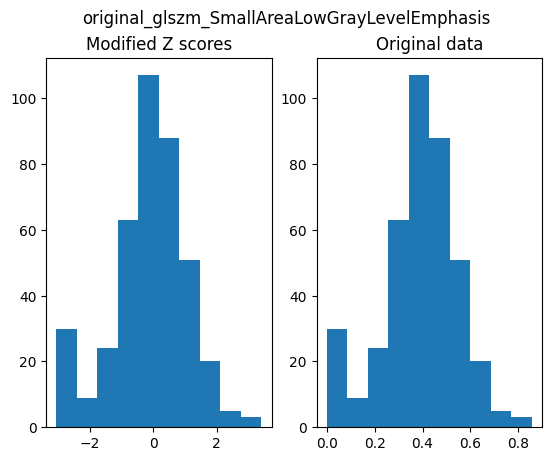

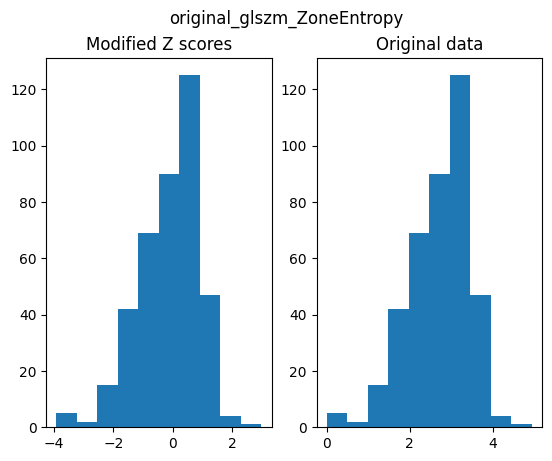

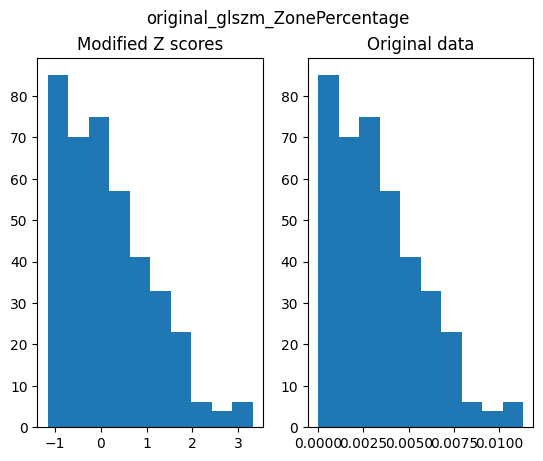

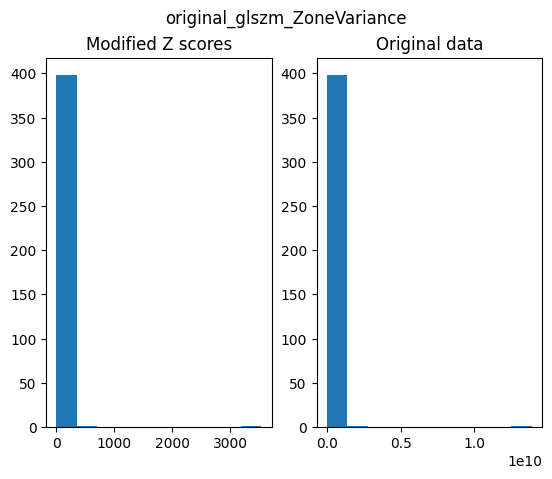

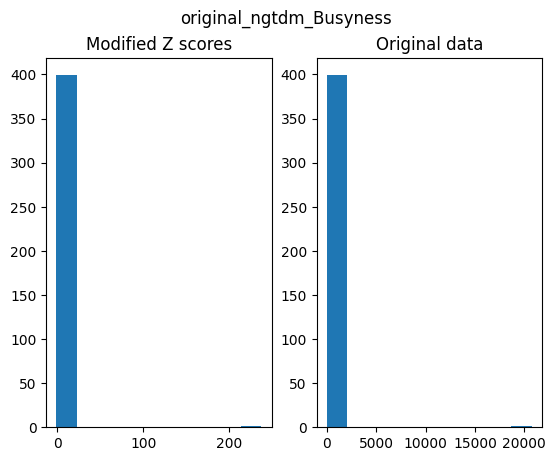

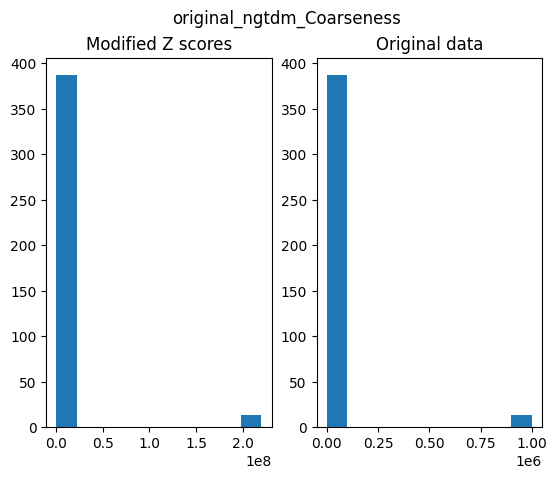

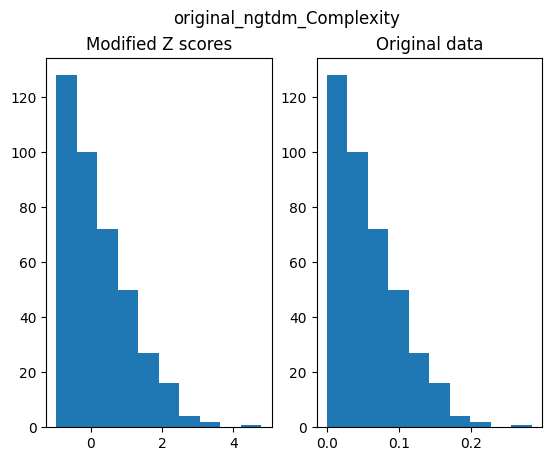

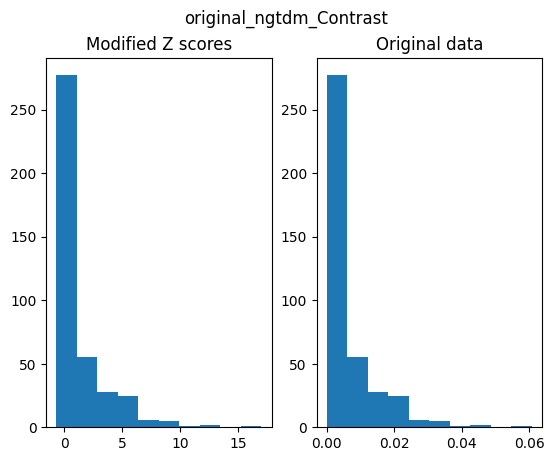

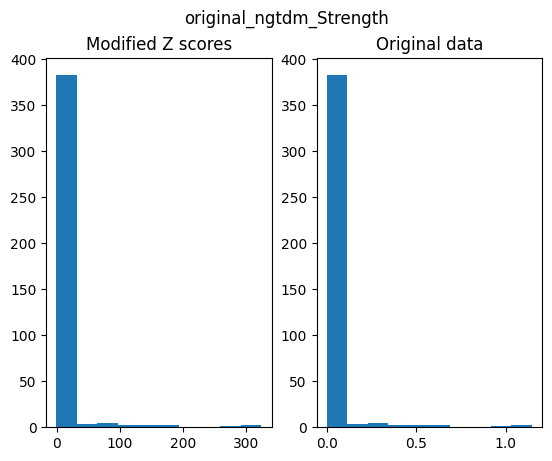

In [8]:
for col in df_mod_zscores:
  if col == "ID":
    continue
  fig, (ax1, ax2) = plt.subplots(1, 2)
  plt.suptitle(col)
  ax1.hist(df_mod_zscores[col])
  ax1.set_title("Modified Z scores")
  ax2.hist(df_train[col])
  ax2.set_title("Original data")
  plt.show()

### Data cleaning functions

In [7]:
def renameColumns(df): # rename the target columns
  df = df.rename(columns={'pCR (outcome)': 'PCR', 'RelapseFreeSurvival (outcome)': 'RFS'})
  df = df.dropna(subset=['PCR'])
  df = df.reset_index(drop=True)
  return df

def replaceWithNaN(df): # replace 999 values with nan
  '''Replace 999 with nan'''
  return df.replace(999, np.nan)

def getOnlyTumourColumns(df): # get only tumour columns
  '''Returns a df with only tumour (original_) columns from the input df.'''
  tumour_col_names = []
  for i in list(df.columns):
    if "original_" in i:
      tumour_col_names.append(i)
  return df[tumour_col_names]

def removeAnomalies(df):
  # Remove coarseness is 1000000 - DONE - WORKS
  anomaly_ids = []
  for i, data in enumerate(df["original_ngtdm_Coarseness"]):
    if data == 1000000:
      anomaly_ids.append(df["ID"][i])
  df["outlier"] = df["ID"].isin(anomaly_ids)
  df = df[df["outlier"] == False]
  df = df.drop("outlier", axis=1)
  df.reset_index(inplace=True, drop=True)

  # Remove items based on isolation forest
  df_tumour = getOnlyTumourColumns(df)

  clf = IsolationForest(random_state=42)
  clf.fit(df_tumour)

  anomaly_scores = clf.decision_function(df_tumour)
  df["outlier_score"] = anomaly_scores

  df = df[df['outlier_score'] >= -0.05] # remove rows with outlier_score < -0.5
  df.reset_index(inplace=True, drop=True)

  df = df.drop(["outlier_score"], axis=1)

  return df

def group_based_imputation(df, feature, groupby_col='PCR'): # do group based imputation using the mode (most frequent) value

    imputer = SimpleImputer(strategy='most_frequent')

    df.loc[:, feature] = df.groupby(groupby_col)[feature].transform(lambda x: imputer.fit_transform(x.values.reshape(-1, 1)).flatten())
    return df

def inputeMissingValues(df):
  # group based on PCR groups & fill missing values with mode
  
  missing_cols = ['PgR', 'HER2', 'TrippleNegative', 'ChemoGrade', 'Proliferation', 'HistologyType', 'LNStatus', 'Gene']

  for col in missing_cols:
      df.loc[df['PCR'].isna() == False] = group_based_imputation(df.loc[df['PCR'].isna() == False], col)

  return df

In [8]:
df_train = pd.read_excel('TrainDataset2024.xls')
df_train = replaceWithNaN(df_train)
df_train = renameColumns(df_train)
df_train = removeAnomalies(df_train)
df_train = inputeMissingValues(df_train)
df_train

,ID,PCR,RFS,Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,TRG002174,1.0,144.000000,41.0,0,0.0,0.0,1.0,3.0,3.0,...,0.517172,0.375126,3.325332,0.002314,3.880772e+06,473.464852,0.000768,0.182615,0.030508,0.000758
1,TRG002178,0.0,142.000000,39.0,1,1.0,0.0,0.0,3.0,3.0,...,0.444391,0.444391,3.032144,0.005612,2.372010e+06,59.459710,0.004383,0.032012,0.001006,0.003685
2,TRG002204,1.0,135.000000,31.0,0,0.0,0.0,1.0,2.0,1.0,...,0.534549,0.534549,2.485848,0.006752,1.540027e+06,33.935384,0.007584,0.024062,0.000529,0.006447
3,TRG002206,0.0,12.000000,35.0,0,0.0,0.0,1.0,3.0,3.0,...,0.506185,0.506185,2.606255,0.003755,6.936741e+06,46.859265,0.005424,0.013707,0.000178,0.004543
4,TRG002210,0.0,109.000000,61.0,1,0.0,0.0,0.0,2.0,1.0,...,0.462282,0.462282,2.809279,0.006521,1.265399e+06,39.621023,0.006585,0.034148,0.001083,0.005626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,TRG002948,0.0,54.500000,58.5,1,0.0,1.0,0.0,3.0,2.0,...,0.476493,0.476493,2.453583,0.003229,2.327038e+06,18.562377,0.013766,0.018042,0.000288,0.012257
367,TRG002954,0.0,49.250000,34.3,0,0.0,0.0,1.0,3.0,3.0,...,0.418382,0.418382,2.995603,0.004243,1.005061e+06,156.627179,0.002228,0.136015,0.022148,0.002098
368,TRG002958,0.0,48.500000,53.3,0,0.0,0.0,1.0,2.0,1.0,...,0.527779,0.527778,1.500000,0.003728,2.132007e+05,0.996746,0.252582,0.007380,0.000037,0.231059
369,TRG002961,0.0,47.500000,68.8,1,0.0,0.0,0.0,3.0,3.0,...,0.313693,0.313693,3.573557,0.001112,2.008034e+07,204.864200,0.001372,0.054063,0.003697,0.001368


<Axes: xlabel='PCR', ylabel='count'>

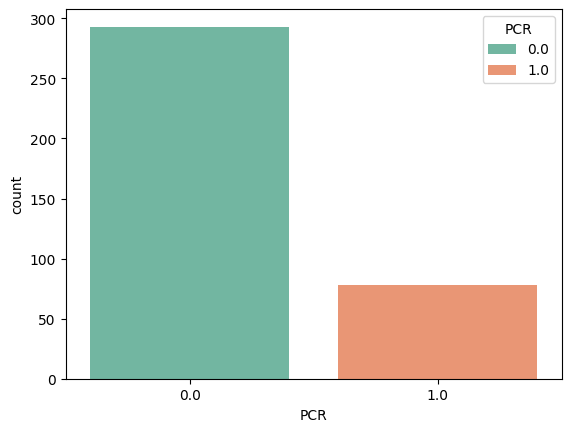

In [9]:
sns.countplot(x='PCR', data=df_train, hue='PCR', palette='Set2') # PCR outcome

In [10]:
count_PCR_0 = df_train[df_train["PCR"] == 0].shape[0]
count_PCR_1 = df_train[df_train["PCR"] == 1].shape[0]
print("Count PCR 0:", count_PCR_0)
print("Count PCR 1:", count_PCR_1)
print("1s as proportion of 0s is:", round(count_PCR_1/count_PCR_0, 3))


Count PCR 0: 293
Count PCR 1: 78
1s as proportion of 0s is: 0.266


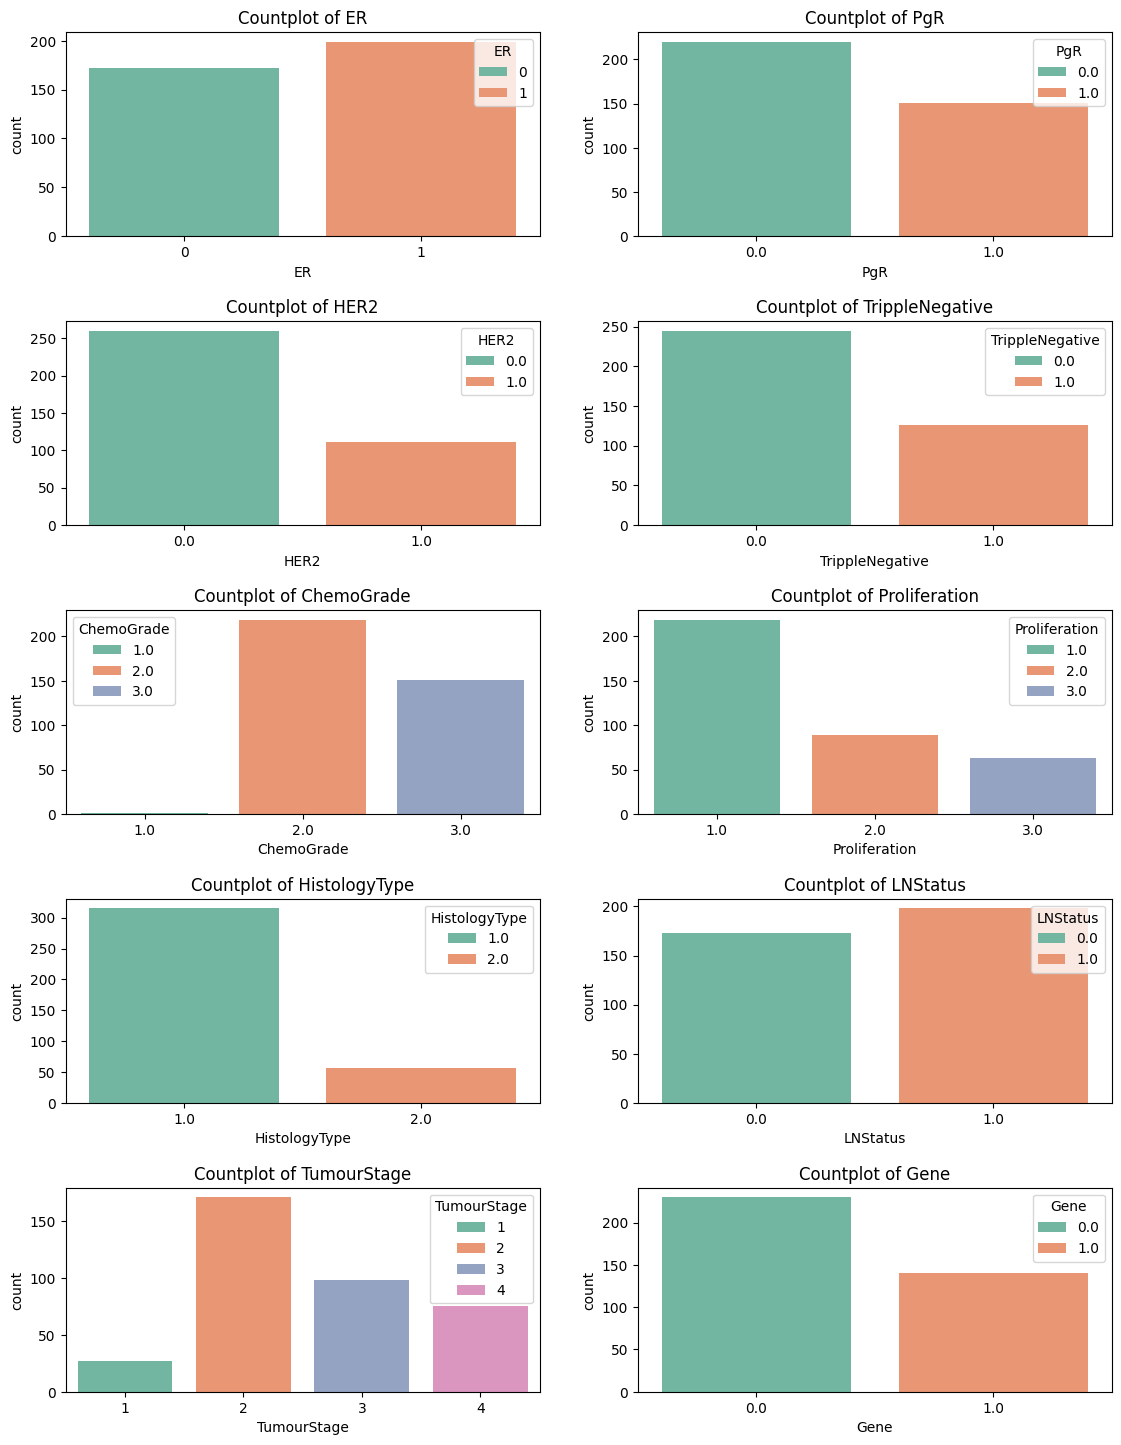

In [11]:
cat_features = ['ER', 'PgR', 'HER2', 'TrippleNegative', 'ChemoGrade', 'Proliferation', 'HistologyType', 'LNStatus', 'TumourStage', 'Gene']

fig, axes = plt.subplots(5, 2, figsize=(12, 15))
fig.tight_layout(pad=4.0)

for i, feature in enumerate(cat_features):
    row = i // 2
    col = i % 2
    sns.countplot(x=feature, data=df_train, hue=feature, palette='Set2', ax=axes[row, col])
    axes[row, col].set_title(f'Countplot of {feature}')

plt.show()


### PCA

In [12]:
#reduces tumour columns to 8 principle components
def pca(X):
    X_tumour = X.drop(X.columns[:11], axis=1)
    #print(X_tumour.columns)
    X = X.drop(X_tumour.columns,axis=1)
    scaler = StandardScaler()
    Xs = scaler.fit_transform(X_tumour)
    components = 8
    pca = PCA(n_components=components)
    X_pca = pca.fit_transform(Xs)
    pca_df = pd.DataFrame(X_pca)
    pca_df.rename(mapper=lambda x: f'pca_{x}', inplace=True, axis=1)
    df = X.join(pca_df)
    return df, pca, scaler


def pca_classification(df):
  X = df.drop(['ID', 'PCR', 'RFS'], axis=1)
  y = df['PCR']
  X_pca, pca_returned, scaler_returned = pca(X)
  X_train,X_test,y_train,y_test = train_test_split(X_pca, y, test_size=0.3, random_state=1, stratify=y)
  return X_train, X_test, y_train, y_test, pca_returned, scaler_returned

def pca_regression(df):
  X = df.drop(['ID', 'PCR', 'RFS'], axis=1)
  y = df['RFS']
  X_pca, pca_returned, scaler_returned = pca(X)
  X_train,X_test,y_train,y_test = train_test_split(X_pca, y, test_size=0.3, random_state=1)
  return X_train, X_test, y_train, y_test, pca_returned, scaler_returned


def pca_eigenvectors(df, pca):
  feature_names = df[df.columns[14:]].columns
  loadings = pd.DataFrame(pca.components_.T,columns = [f"PCA_{x}" for x in range(8)], index= feature_names)
  important_features = {}
  for component in loadings.columns:
    loadings_sorted = loadings.reindex(loadings[component].abs().sort_values(ascending=False).index)
    important_features[component] = loadings_sorted.head().index.values
  print(pca.explained_variance_ratio_.sum())
  return pd.DataFrame(important_features, columns = important_features.keys())

### Feature Selection

In [13]:
def remove_highly_correlated_features(X, threshold=0.95):

    # Removes one feature from each pair of highly correlated features

    corr_matrix = X.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    high_corr_features = [column for column in upper.columns if any(upper[column] > threshold)]
    print(f"Removed {len(high_corr_features)} highly correlated features.")
    return X.drop(columns=high_corr_features)



def select_features_random_forest(X, y, k=10, random_state=1):
    # selects top k features based on random forest regressor feature importance
    rf = RandomForestRegressor(random_state=random_state)
    rf.fit(X, y)
    feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
    top_features = feature_importances.head(k).index
    features = set(['ER','HER2','Gene'])
    i=0
    while len(features) < k:
      features.add(top_features[i])
      i+=1
    print(f"Top {k} features based on Random Forest importance:\n{features}")
    return X[list(features)], y



def select_features_rfe(X, y, n_features_to_select=10):
    # Recursive Feature Elimination (RFE) to select top features, uses linear regression model

    model = LinearRegression()
    rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)
    rfe.fit(X, y)
    selected_features = X.columns[rfe.support_]
    print(f"Selected {n_features_to_select} features using RFE:\n{selected_features.tolist()}")
    return X[selected_features]



In [14]:
df_train = pd.read_excel('TrainDataset2024.xls')
df_train = replaceWithNaN(df_train)
df_train = renameColumns(df_train)
df_train = removeAnomalies(df_train)
df_train = inputeMissingValues(df_train)
df_train

,ID,PCR,RFS,Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,TRG002174,1.0,144.000000,41.0,0,0.0,0.0,1.0,3.0,3.0,...,0.517172,0.375126,3.325332,0.002314,3.880772e+06,473.464852,0.000768,0.182615,0.030508,0.000758
1,TRG002178,0.0,142.000000,39.0,1,1.0,0.0,0.0,3.0,3.0,...,0.444391,0.444391,3.032144,0.005612,2.372010e+06,59.459710,0.004383,0.032012,0.001006,0.003685
2,TRG002204,1.0,135.000000,31.0,0,0.0,0.0,1.0,2.0,1.0,...,0.534549,0.534549,2.485848,0.006752,1.540027e+06,33.935384,0.007584,0.024062,0.000529,0.006447
3,TRG002206,0.0,12.000000,35.0,0,0.0,0.0,1.0,3.0,3.0,...,0.506185,0.506185,2.606255,0.003755,6.936741e+06,46.859265,0.005424,0.013707,0.000178,0.004543
4,TRG002210,0.0,109.000000,61.0,1,0.0,0.0,0.0,2.0,1.0,...,0.462282,0.462282,2.809279,0.006521,1.265399e+06,39.621023,0.006585,0.034148,0.001083,0.005626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,TRG002948,0.0,54.500000,58.5,1,0.0,1.0,0.0,3.0,2.0,...,0.476493,0.476493,2.453583,0.003229,2.327038e+06,18.562377,0.013766,0.018042,0.000288,0.012257
367,TRG002954,0.0,49.250000,34.3,0,0.0,0.0,1.0,3.0,3.0,...,0.418382,0.418382,2.995603,0.004243,1.005061e+06,156.627179,0.002228,0.136015,0.022148,0.002098
368,TRG002958,0.0,48.500000,53.3,0,0.0,0.0,1.0,2.0,1.0,...,0.527779,0.527778,1.500000,0.003728,2.132007e+05,0.996746,0.252582,0.007380,0.000037,0.231059
369,TRG002961,0.0,47.500000,68.8,1,0.0,0.0,0.0,3.0,3.0,...,0.313693,0.313693,3.573557,0.001112,2.008034e+07,204.864200,0.001372,0.054063,0.003697,0.001368


In [15]:
df_tumour = getOnlyTumourColumns(df_train)
multivariate_normality(df_tumour, alpha = 0.5)

HZResults(hz=1484, pval=0.0, normal=False)

## Classification Models

### SVC Classification

Best balanced accuracy with hyperparameter tuning: 0.7333702882483369
Best parameters with hyperparameter tuning: {'C': 1.0, 'kernel': 'linear'}
Balanced accuracy score on Test Set: 0.807


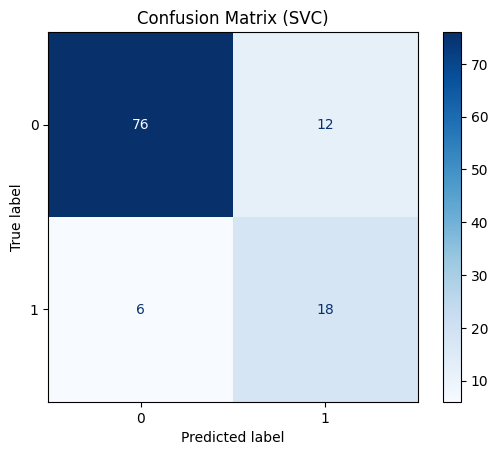

In [33]:
X_train, X_test, y_train, y_test, pca_returned, scaler_returned = pca_classification(df_train)

param_grid = {
    'C': np.arange(0.1,1.5,0.1),
    'kernel': ['linear','rbf','sigmoid']
}

grid_search = GridSearchCV(SVC(gamma='auto', degree=3),
                           param_grid, cv=5, scoring='balanced_accuracy', n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)

best_svc_clf = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best balanced accuracy with hyperparameter tuning:", grid_search.best_score_)
print("Best parameters with hyperparameter tuning:", best_params)

best_svc_clf.fit(X_train, y_train)
y_pred = best_svc_clf.predict(X_test)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced accuracy score on Test Set: {round(balanced_acc, 3)}")

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (SVC)")
plt.show()

### Decision Tree Classification

Best balanced accuracy with hyperparameter tuning: 0.7520177383592017
Best parameters with hyperparameter tuning: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Balanced accuracy score on Test Set: 0.782


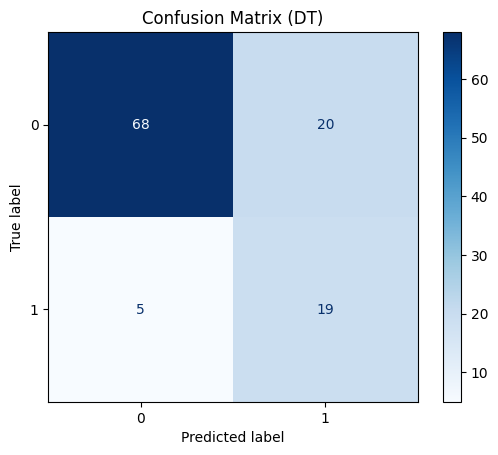

In [37]:
X_train, X_test, y_train, y_test, pca_returned, scaler_returned = pca_classification(df_train)

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=1, class_weight='balanced'),
                           param_grid, cv=5, scoring='balanced_accuracy', n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)

best_dt_clf = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best balanced accuracy with hyperparameter tuning:", grid_search.best_score_)
print("Best parameters with hyperparameter tuning:", best_params)

y_pred = best_dt_clf.predict(X_test)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced accuracy score on Test Set: {round(balanced_acc, 3)}")

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (DT)")
plt.show()

#### Other

In [38]:
X = df_train.drop(['ID', 'PCR', 'RFS'], axis=1) # drop ID: it is type object, drop PCR & RFS: outcomes
y = df_train['PCR']

scaler = StandardScaler()
Xs = scaler.fit_transform(X)

Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.25, random_state=1, stratify=y)

initial_dt_clf = DecisionTreeClassifier(random_state=1, class_weight='balanced')
initial_dt_clf.fit(Xs_train, y_train)

feature_importances = pd.Series(initial_dt_clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top 10 features based on importance:\n", feature_importances.head(10))


Top 10 features based on importance:
 Gene                                         0.443687
original_glcm_MCC                            0.050231
original_firstorder_InterquartileRange       0.047360
HER2                                         0.041390
original_gldm_DependenceVariance             0.039088
original_firstorder_MeanAbsoluteDeviation    0.036353
original_firstorder_Maximum                  0.036232
original_firstorder_RootMeanSquared          0.036054
original_glrlm_GrayLevelNonUniformity        0.035553
original_gldm_SmallDependenceEmphasis        0.033411
dtype: float64


Best balanced accuracy with hyperparameter tuning: 0.8325757575757576
Best parameters with hyperparameter tuning: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


Cross-Validation Accuracy Scores on Training Set: [0.82142857 0.78571429 0.75       0.63636364 0.81818182]
Average Cross-Validation Accuracy on Training Set: 0.7623376623376623


Cross-Validation Balanced Accuracy Scores on Training Set: [0.875      0.86363636 0.80208333 0.60863095 0.8125    ]
Average Cross-Validation Balanced Accuracy on Training Set: 0.79237012987013


The classifier accuracy score on Test Set: 0.82
Balanced accuracy score on Test Set: 0.847


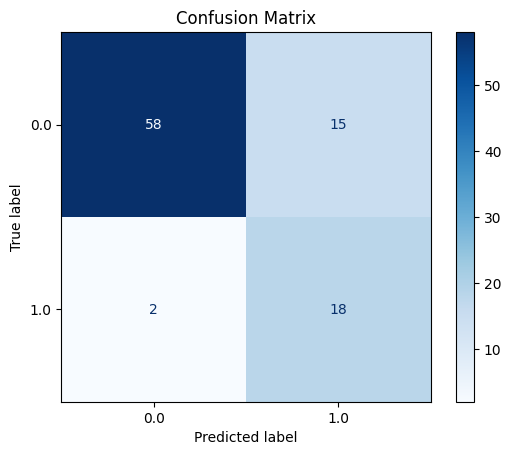

In [39]:
imp_features = ['ER', 'HER2', 'LNStatus', 'Gene']

important_features = feature_importances.head(10).index.to_list()

for i in imp_features:
  if i not in important_features:
    important_features.append(i)


#important_features = feature_importances.head(10).index.to_list() + ['ER', 'HER2', 'LNStatus']

X_imp = X[important_features]
y = df_train['PCR']

scaler = StandardScaler()
Xs_imp = scaler.fit_transform(X_imp)

Xsi_train, Xsi_test, y_train, y_test = train_test_split(Xs_imp, y, test_size=0.25, random_state=1, stratify=y)

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=1, class_weight='balanced'),
                           param_grid, cv=5, scoring='balanced_accuracy', n_jobs=-1, verbose=0)
grid_search.fit(Xsi_train, y_train)

best_dt_clf = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best balanced accuracy with hyperparameter tuning:", grid_search.best_score_)
print("Best parameters with hyperparameter tuning:", best_params)

print('\n')

kf = KFold(n_splits=5, shuffle=True, random_state=1)
cv_scores = cross_val_score(best_dt_clf, Xsi_train, y_train, cv=kf, scoring='accuracy')
print("Cross-Validation Accuracy Scores on Training Set:", cv_scores)
print("Average Cross-Validation Accuracy on Training Set:", cv_scores.mean())

print('\n')

cv_balanced_scores = cross_val_score(best_dt_clf, Xsi_train, y_train, cv=kf, scoring='balanced_accuracy')
print("Cross-Validation Balanced Accuracy Scores on Training Set:", cv_balanced_scores)
print("Average Cross-Validation Balanced Accuracy on Training Set:", cv_balanced_scores.mean())

print('\n')

y_pred = best_dt_clf.predict(Xsi_test)
dt_clf_score = best_dt_clf.score(Xsi_test, y_test)
print('The classifier accuracy score on Test Set: {:03.2f}'.format(dt_clf_score))

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced accuracy score on Test Set: {round(balanced_acc, 3)}")

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_dt_clf.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

#### Decision Tree with SMOTE

Best balanced accuracy with hyperparameter tuning: 0.8318181818181818
Best parameters with hyperparameter tuning: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}


Cross-Validation Accuracy Scores on Resampled Training Set: [0.75757576 0.8030303  0.6969697  0.77272727 0.81818182]
Average Cross-Validation Accuracy on Resampled Training Set: 0.7696969696969698


Cross-Validation Balanced Accuracy Scores on Resampled Training Set: [0.6423913  0.77019231 0.67596154 0.80869565 0.77083333]
Average Cross-Validation Balanced Accuracy on Resampled Training Set: 0.7336148272017837


The classifier accuracy score on Test Set: 0.83
Balanced accuracy score on Test Set: 0.782


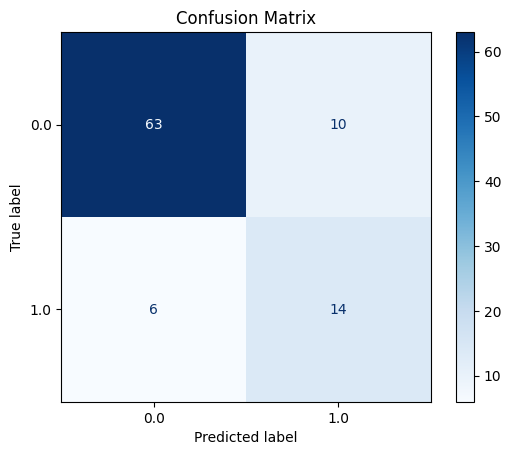

In [64]:


X = df_train.drop(['ID', 'PCR', 'RFS'], axis=1) 
y = df_train['PCR']

scaler = StandardScaler()
Xs = scaler.fit_transform(X)

Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.25, random_state=1, stratify=y)

smote = SMOTE(random_state=1, sampling_strategy=0.5)
Xs_train_resampled, y_train_resampled = smote.fit_resample(Xs_train, y_train)

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dec_tree = DecisionTreeClassifier(random_state=1)
grid_search = GridSearchCV(dec_tree, param_grid, cv=5, scoring='balanced_accuracy', n_jobs=-1, verbose=0)
grid_search.fit(Xs_train_resampled, y_train_resampled)

best_dec_tree = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best balanced accuracy with hyperparameter tuning:", grid_search.best_score_)
print("Best parameters with hyperparameter tuning:", best_params)

print('\n')

kf = KFold(n_splits=5, shuffle=True, random_state=1)
cv_scores = cross_val_score(best_dec_tree, Xs_train_resampled, y_train_resampled, cv=kf, scoring='accuracy')
print("Cross-Validation Accuracy Scores on Resampled Training Set:", cv_scores)
print("Average Cross-Validation Accuracy on Resampled Training Set:", cv_scores.mean())

print('\n')

cv_balanced_scores = cross_val_score(best_dec_tree, Xs_train_resampled, y_train_resampled, cv=kf, scoring='balanced_accuracy')
print("Cross-Validation Balanced Accuracy Scores on Resampled Training Set:", cv_balanced_scores)
print("Average Cross-Validation Balanced Accuracy on Resampled Training Set:", cv_balanced_scores.mean())

print('\n')

y_pred = best_dec_tree.predict(Xs_test)
dec_tree_score = best_dec_tree.score(Xs_test, y_test)
print('The classifier accuracy score on Test Set: {:03.2f}'.format(dec_tree_score))

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced accuracy score on Test Set: {round(balanced_acc, 3)}")

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_dec_tree.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

### Random Forest Classification

Best balanced accuracy with hyperparameter tuning: 0.8196674057649667
Best parameters with hyperparameter tuning: {'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Balanced accuracy score on Test Set: 0.812


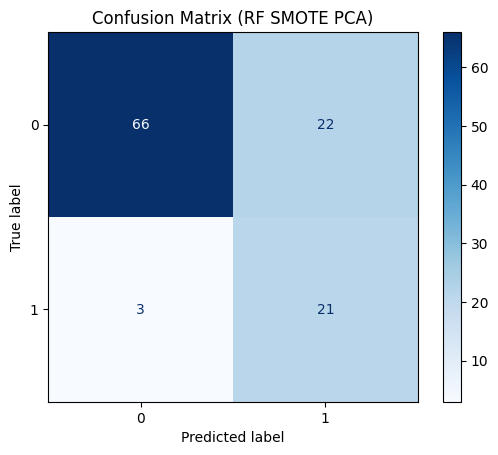

In [22]:
X_train, X_test, y_train, y_test, pca_returned, scaler_returned = pca_classification(df_train)

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': [None]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=1, class_weight='balanced'),
                           param_grid, cv=5, scoring='balanced_accuracy', n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)

best_rf_clf = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best balanced accuracy with hyperparameter tuning:", grid_search.best_score_)
print("Best parameters with hyperparameter tuning:", best_params)

y_pred = best_rf_clf.predict(X_test)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced accuracy score on Test Set: {round(balanced_acc, 3)}")

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (RF)")
plt.show()

#### Random Forest with SMOTE

In [55]:
X = df_train.drop(['ID', 'PCR', 'RFS'], axis=1) # drop ID: it is type object, drop PCR & RFS: outcomes
y = df_train['PCR']

scaler = StandardScaler()
Xs = scaler.fit_transform(X)

Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.25, random_state=1, stratify=y)

smote = SMOTE(random_state=1, sampling_strategy=0.5)
Xs_train_resampled, y_train_resampled = smote.fit_resample(Xs_train, y_train)

initial_rf_clf = RandomForestClassifier(random_state=1, class_weight='balanced')
initial_rf_clf.fit(Xs_train_resampled, y_train_resampled)

feature_importances = pd.Series(initial_rf_clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top 10 features based on importance:\n", feature_importances.head(10))

Top 10 features based on importance:
 Gene                                             0.174909
HER2                                             0.029948
original_gldm_SmallDependenceEmphasis            0.014068
original_glrlm_ShortRunLowGrayLevelEmphasis      0.013807
PgR                                              0.013631
original_glcm_MCC                                0.012979
original_glcm_Imc1                               0.012386
original_firstorder_Kurtosis                     0.012103
original_firstorder_MeanAbsoluteDeviation        0.011325
original_glszm_LargeAreaHighGrayLevelEmphasis    0.011053
dtype: float64


Best balanced accuracy with hyperparameter tuning: 0.884090909090909
Best parameters with hyperparameter tuning: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}


Cross-Validation Accuracy Scores on Resampled Training Set: [0.90909091 0.89393939 0.83333333 0.81818182 0.84848485]
Average Cross-Validation Accuracy on Resampled Training Set: 0.8606060606060606


Cross-Validation Balanced Accuracy Scores on Resampled Training Set: [0.92065217 0.88557692 0.85576923 0.86956522 0.80902778]
Average Cross-Validation Balanced Accuracy on Resampled Training Set: 0.8681182645856559


The classifier accuracy score on Test Set: 0.84
Balanced accuracy score on Test Set: 0.807


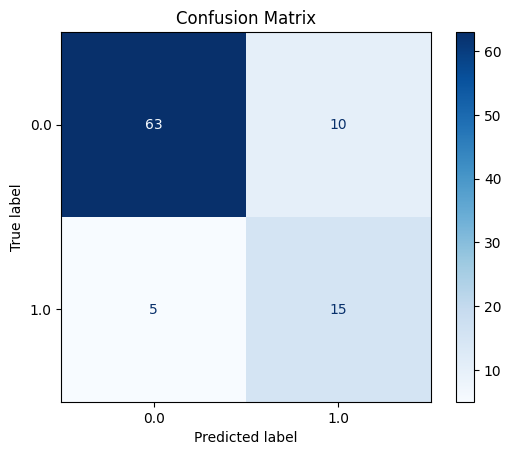

In [56]:
imp_features = ['ER', 'HER2', 'LNStatus', 'Gene']

important_features = feature_importances.head(10).index.to_list()

for i in imp_features:
  if i not in important_features:
    important_features.append(i)


#important_features = feature_importances.head(10).index.to_list() + ['ER', 'LNStatus']
X_imp = X[important_features]

scaler = StandardScaler()
Xs_imp = scaler.fit_transform(X_imp)

Xsi_train, Xsi_test, y_train, y_test = train_test_split(Xs_imp, y, test_size=0.25, random_state=1, stratify=y)

Xsi_train_resampled, y_train_resampled = smote.fit_resample(Xsi_train, y_train)

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': [None]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=1, class_weight='balanced'),
                           param_grid, cv=5, scoring='balanced_accuracy', n_jobs=-1, verbose=0)
grid_search.fit(Xsi_train_resampled, y_train_resampled)

best_rf_clf = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best balanced accuracy with hyperparameter tuning:", grid_search.best_score_)
print("Best parameters with hyperparameter tuning:", best_params)

print('\n')

kf = KFold(n_splits=5, shuffle=True, random_state=1)
cv_scores = cross_val_score(best_rf_clf, Xsi_train_resampled, y_train_resampled, cv=kf, scoring='accuracy')
print("Cross-Validation Accuracy Scores on Resampled Training Set:", cv_scores)
print("Average Cross-Validation Accuracy on Resampled Training Set:", cv_scores.mean())

print('\n')

cv_balanced_scores = cross_val_score(best_rf_clf, Xsi_train_resampled, y_train_resampled, cv=kf, scoring='balanced_accuracy')
print("Cross-Validation Balanced Accuracy Scores on Resampled Training Set:", cv_balanced_scores)
print("Average Cross-Validation Balanced Accuracy on Resampled Training Set:", cv_balanced_scores.mean())

print('\n')

y_pred = best_rf_clf.predict(Xsi_test)
rf_clf_score = best_rf_clf.score(Xsi_test, y_test)
print('The classifier accuracy score on Test Set: {:03.2f}'.format(rf_clf_score))

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced accuracy score on Test Set: {round(balanced_acc, 3)}")

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_rf_clf.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


### Logistic Regression

Balanced accuracy score on Test Set: 0.833


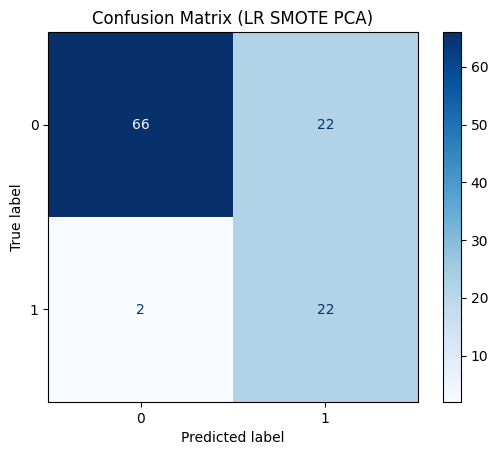

In [23]:
X_train, X_test, y_train, y_test, pca_returned, scaler_returned = pca_classification(df_train)

clf=LogisticRegression(random_state=1, class_weight='balanced', max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced accuracy score on Test Set: {round(balanced_acc, 3)}")

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (LR)")
plt.show()

#### Logistic Regression with SMOTE

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty

Best balanced accuracy with hyperparameter tuning: 0.8704545454545454
Best parameters with hyperparameter tuning: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'saga'}


Cross-Validation Accuracy Scores on Resampled Training Set: [0.84848485 0.86363636 0.8030303  0.84848485 0.83333333]
Average Cross-Validation Accuracy on Resampled Training Set: 0.8393939393939395


Cross-Validation Balanced Accuracy Scores on Resampled Training Set: [0.86304348 0.86057692 0.8375     0.89130435 0.81597222]
Average Cross-Validation Balanced Accuracy on Resampled Training Set: 0.8536793942772203


The classifier accuracy score on Test Set: 0.81
Balanced accuracy score on Test Set: 0.804


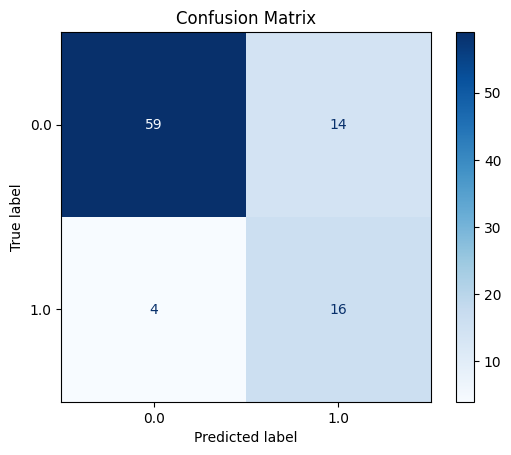

In [57]:

X = df_train.drop(['ID', 'PCR', 'RFS'], axis=1)
y = df_train['PCR']

scaler = StandardScaler()
Xs = scaler.fit_transform(X)

Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.25, random_state=1, stratify=y)

smote = SMOTE(random_state=1, sampling_strategy=0.5)
Xs_train_resampled, y_train_resampled = smote.fit_resample(Xs_train, y_train)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'solver': ['liblinear', 'saga'],
    'class_weight': ['balanced']
}

log_reg = LogisticRegression(random_state=1, max_iter=1000)
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='balanced_accuracy', n_jobs=-1, verbose=0)
grid_search.fit(Xs_train_resampled, y_train_resampled)

best_log_reg = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best balanced accuracy with hyperparameter tuning:", grid_search.best_score_)
print("Best parameters with hyperparameter tuning:", best_params)

print('\n')

kf = KFold(n_splits=5, shuffle=True, random_state=1)
cv_scores = cross_val_score(best_log_reg, Xs_train_resampled, y_train_resampled, cv=kf, scoring='accuracy')
print("Cross-Validation Accuracy Scores on Resampled Training Set:", cv_scores)
print("Average Cross-Validation Accuracy on Resampled Training Set:", cv_scores.mean())

print('\n')

cv_balanced_scores = cross_val_score(best_log_reg, Xs_train_resampled, y_train_resampled, cv=kf, scoring='balanced_accuracy')
print("Cross-Validation Balanced Accuracy Scores on Resampled Training Set:", cv_balanced_scores)
print("Average Cross-Validation Balanced Accuracy on Resampled Training Set:", cv_balanced_scores.mean())

print('\n')

y_pred = best_log_reg.predict(Xs_test)
log_reg_score = best_log_reg.score(Xs_test, y_test)
print('The classifier accuracy score on Test Set: {:03.2f}'.format(log_reg_score))

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced accuracy score on Test Set: {round(balanced_acc, 3)}")

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_log_reg.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


### Naive Bayes Classification

Balanced accuracy score on Test Set: 0.79


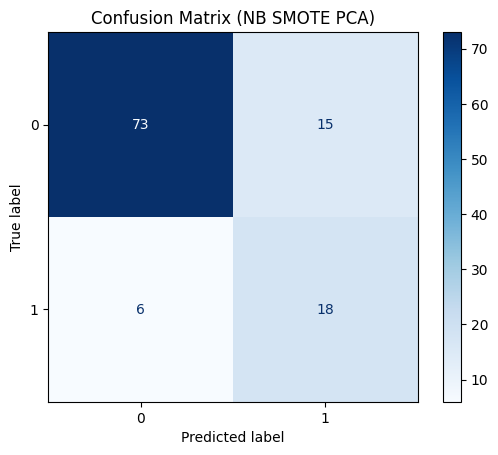

In [24]:
X_train, X_test, y_train, y_test, pca_returned, scaler_returned = pca_classification(df_train)

gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)

y_pred = gnb_clf.predict(X_test)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced accuracy score on Test Set: {round(balanced_acc, 3)}")

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (NB)")
plt.show()

#### Naive Bayes with SMOTE

Cross-Validation Accuracy Scores on Resampled Training Set: [0.63636364 0.66666667 0.57575758 0.62121212 0.56060606]
Average Cross-Validation Accuracy on Resampled Training Set: 0.6121212121212121


Cross-Validation Balanced Accuracy Scores on Resampled Training Set: [0.69673913 0.65769231 0.58942308 0.68586957 0.52430556]
Average Cross-Validation Balanced Accuracy on Resampled Training Set: 0.6308059271646227


The classifier accuracy score on Test Set: 0.65
Balanced accuracy score on Test Set: 0.738


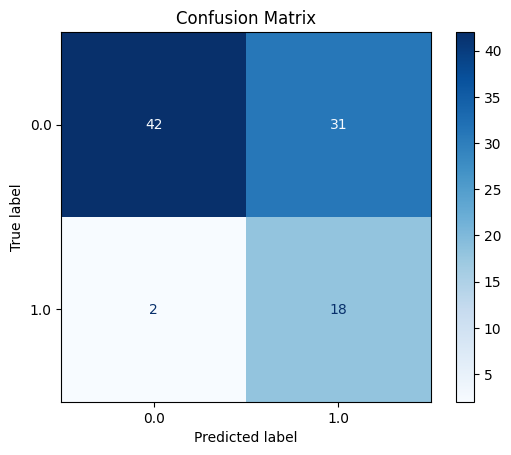

In [65]:

X = df_train.drop(['ID', 'PCR', 'RFS'], axis=1)
y = df_train['PCR']

scaler = StandardScaler()
Xs = scaler.fit_transform(X)

Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.25, random_state=1, stratify=y)

smote = SMOTE(random_state=1, sampling_strategy=0.5)
Xs_train_resampled, y_train_resampled = smote.fit_resample(Xs_train, y_train)

nb_model = GaussianNB()

kf = KFold(n_splits=5, shuffle=True, random_state=1)
cv_scores = cross_val_score(nb_model, Xs_train_resampled, y_train_resampled, cv=kf, scoring='accuracy')
print("Cross-Validation Accuracy Scores on Resampled Training Set:", cv_scores)
print("Average Cross-Validation Accuracy on Resampled Training Set:", cv_scores.mean())

print('\n')

cv_balanced_scores = cross_val_score(nb_model, Xs_train_resampled, y_train_resampled, cv=kf, scoring='balanced_accuracy')
print("Cross-Validation Balanced Accuracy Scores on Resampled Training Set:", cv_balanced_scores)
print("Average Cross-Validation Balanced Accuracy on Resampled Training Set:", cv_balanced_scores.mean())

print('\n')

nb_model.fit(Xs_train_resampled, y_train_resampled)
y_pred = nb_model.predict(Xs_test)
nb_score = nb_model.score(Xs_test, y_test)
print('The classifier accuracy score on Test Set: {:03.2f}'.format(nb_score))

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced accuracy score on Test Set: {round(balanced_acc, 3)}")

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=nb_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


### MLP Classification

Best balanced accuracy with hyperparameter tuning: 0.5126829268292683
Best parameters with hyperparameter tuning: {'alpha': 0.36000000000000004, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'momentum': 0.9}
Balanced accuracy score on Test Set: 0.705


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


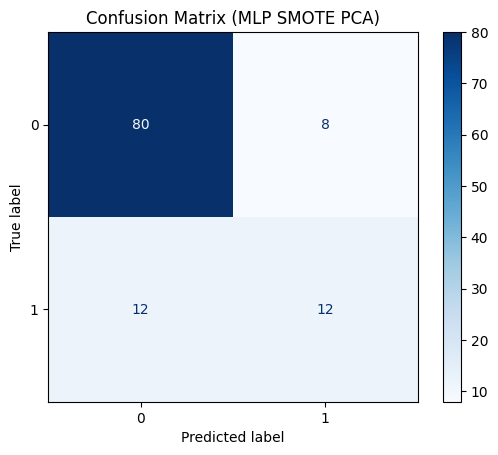

In [25]:
X_train, X_test, y_train, y_test, pca_returned, scaler_returned = pca_classification(df_train)

param_grid = {
    'alpha': np.arange(0.01,0.5,0.05),
    'learning_rate': ['adaptive','constant'],
    'hidden_layer_sizes': [(50,),(100,),(50,50),(100,100)],
    'momentum': np.arange(0,1.0,0.1)
}

grid_search = GridSearchCV(MLPClassifier(activation ='tanh', random_state = 1, max_iter= 1000, solver='sgd'),
                           param_grid, cv=5, scoring='balanced_accuracy', n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)

best_mlp_clf = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best balanced accuracy with hyperparameter tuning:", grid_search.best_score_)
print("Best parameters with hyperparameter tuning:", best_params)


y_pred = best_mlp_clf.predict(X_test)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced accuracy score on Test Set: {round(balanced_acc, 3)}")

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (MLP)")
plt.show()

#### MLP with SMOTE

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterat

Best balanced accuracy with hyperparameter tuning: 0.8772727272727272
Best parameters with hyperparameter tuning: {'alpha': 0.01, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'adaptive'}
Balanced accuracy score on Test Set: 0.8


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


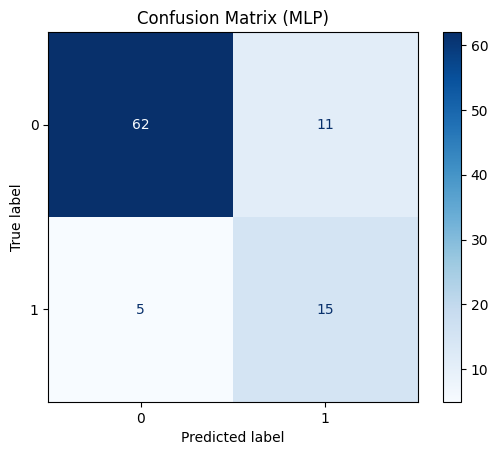

In [67]:
X = df_train.drop(['ID', 'PCR', 'RFS'], axis=1) 
y = df_train['PCR']

scaler = StandardScaler()
Xs = scaler.fit_transform(X)

Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.25, random_state=1, stratify=y)

smote = SMOTE(random_state=1, sampling_strategy=0.5)
Xs_train_resampled, y_train_resampled = smote.fit_resample(Xs_train, y_train)

param_grid = {
    'alpha': np.arange(0.01, 0.5, 0.05),
    'learning_rate': ['adaptive', 'constant'],
    'hidden_layer_sizes': [(50, 50), (100, 100)],
}

grid_search = GridSearchCV(MLPClassifier(activation='tanh', random_state=1, max_iter=1000, solver='sgd'),
                           param_grid, cv=5, scoring='balanced_accuracy', n_jobs=-1, verbose=0)
grid_search.fit(Xs_train_resampled, y_train_resampled)

best_mlp_clf = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best balanced accuracy with hyperparameter tuning:", grid_search.best_score_)
print("Best parameters with hyperparameter tuning:", best_params)

y_pred = best_mlp_clf.predict(Xs_test)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced accuracy score on Test Set: {round(balanced_acc, 3)}")

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (MLP)")
plt.show()


## Regression Models

### SVM Regression

In [35]:
X_train, X_test, y_train, y_test, pca_returned, scaler_returned = pca_regression(df_train)

param_grid = {
    'C': np.arange(0.1,1.0,0.1),
    'epsilon': np.arange(0.01,0.5,0.02),
    'kernel': ['rbf', 'linear', 'sigmoid']
}

grid_search = GridSearchCV(SVR(gamma ='auto'),
                           param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)

best_svr_reg = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best neg-MAE with hyperparameter tuning:", grid_search.best_score_)
print("Best parameters with hyperparameter tuning:", best_params)

y_pred = best_svr_reg.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
print(f"MAE score on Test Set: {round(mae, 3)}")

Best neg-MAE with hyperparameter tuning: -21.677223109162377
Best parameters with hyperparameter tuning: {'C': 0.2, 'epsilon': 0.48999999999999994, 'kernel': 'rbf'}
MAE score on Test Set: 20.601


In [36]:
print(f'value ranges found by SVM: [{y_pred.min()}, {y_pred.max()}]')

value ranges found by SVM: [54.23429072597957, 54.6582833007748]


### Random Forest Regression

In [37]:
X_train, X_test, y_train, y_test, pca_returned, scaler_returned = pca_regression(df_train)

param_grid = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', 0.5, None]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=1),
                           param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)

best_rf_reg = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best neg-MAE with hyperparameter tuning:", grid_search.best_score_)
print("Best parameters with hyperparameter tuning:", best_params)

y_pred = best_rf_reg.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
print(f"MAE score on Test Set: {round(mae, 3)}")

Best neg-MAE with hyperparameter tuning: -21.230139786665767
Best parameters with hyperparameter tuning: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
MAE score on Test Set: 20.972


In [38]:
print(f'value ranges found by Random Forest: [{y_pred.min()}, {y_pred.max()}]')

value ranges found by Random Forest: [37.83018055555555, 78.05742857142859]


### Linear Regression

In [39]:
X_train, X_test, y_train, y_test, pca_returned, scaler_returned = pca_regression(df_train)

LinearRegressor = LinearRegression()
LinearRegressor.fit(X_train, y_train)

kf = KFold(n_splits=5, shuffle=True, random_state=1)
cv_scores = cross_val_score(LinearRegressor, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')

y_pred = LinearRegressor.predict(X_test)
print("Average neg-MAE scores:", cv_scores.mean())
mae = mean_absolute_error(y_test,y_pred)
print(f"MAE score on Test Set: {round(mae, 3)}")

Average neg-MAE scores: -22.790244157620936
MAE score on Test Set: 21.612


In [40]:
print(f'value ranges found by Linear Regression: [{y_pred.min()}, {y_pred.max()}]')

value ranges found by Linear Regression: [26.40695523268849, 77.66897048034619]


### MLP Regression

In [41]:
X_train, X_test, y_train, y_test, pca_returned, scaler_returned = pca_regression(df_train)

param_grid = {
    'alpha': np.arange(0.01,0.5,0.05),
    'learning_rate': ['adaptive','constant'],
    'hidden_layer_sizes': [(20,10,5),(20,10),(10,10),(10,)]
    #'momentum': np.arange(0,1.0,0.2)
}

grid_search = GridSearchCV(MLPRegressor(random_state=1, max_iter=5000, activation='relu', solver='adam'),
                           param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)

best_mlp_reg = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best neg-MAE with hyperparameter tuning:", grid_search.best_score_)
print("Best parameters with hyperparameter tuning:", best_params)

y_pred = best_mlp_reg.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
print(f"MAE score on Test Set: {round(mae, 3)}")

Best neg-MAE with hyperparameter tuning: -23.240931594615393
Best parameters with hyperparameter tuning: {'alpha': 0.16000000000000003, 'hidden_layer_sizes': (20, 10), 'learning_rate': 'adaptive'}
MAE score on Test Set: 22.183


In [42]:
print(f'value ranges found by MLP: [{y_pred.min()}, {y_pred.max()}]')

value ranges found by MLP: [24.75197745152921, 91.56940118996849]
